<a href="https://colab.research.google.com/github/puttadharani/Data-surfers/blob/main/zomato_restaurant_clustering_and_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -<b>Zomato restaurant clustering and sentiment analysis
</b>


##### **Project Type**    - Clustering
##### **Contribution**    - Team
##### **Team Member 1 -**Vivek Singh
##### **Team Member 2 -**Dharani Putta
##### **Team Member 3 -**Sunil Kumar


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

This clustering project revolves around the analysis of Zomato restaurant data in Hyderabad,Telangana. The primary objectives are to gain valuable insights from customer sentiments and cluster restaurants into different segments. This project aims to provide benefits to both customers and the Zomato company.

Gathering comprehensive Zomato restaurant data, including details, menus, reviews,Preprocessing the data to ensure its quality by handling missing values, duplicates, and inconsistencies.Conducting an initial exploration of the dataset to understand its characteristics, popular cuisines, pricing, and customer sentiments.

Employing Natural Language Processing (NLP) techniques to analyze user reviews, and visualizing sentiment scores to understand the positivity or negativity associated with different restaurants.

Applying machine learning algorithms to segment restaurants based on factors like cuisine, pricing, and customer ratings. Visualizing these clusters to provide insights.

Deriving actionable insights from the analysis that can aid customers in selecting the best local restaurants based on customer sentiment, cuisine, and cost. Additionally, offering insights to Zomato for improvements and highlighting their strengths.

By effectively clustering restaurants and analyzing customer sentiments, this project aims to assist customers in making informed dining choices while helping Zomato enhance its services. Visualizations and reports will be used to communicate findings and recommendations to stakeholders, making the data more accessible and actionable. The project also includes the identification of influential critics within the industry, offering a holistic view of the Hyderabad restaurant ecosystem.












# **GitHub Link -**

https://github.com/puttadharani/zomato-restaurant-clustering-and-sentiment-analysis-

# **Problem Statement**


In the context of the Zomato restaurant data for Hyderabad, we aim to address two crucial challenges:

**Restaurant Clustering:** The problem of efficiently segmenting restaurants based on multiple attributes, including cuisine, pricing, and customer ratings. By clustering restaurants, we intend to provide a structured view of the restaurant, making it easier for customers to find the most suitable dining options.

**Sentiment Analysis:** The challenge of understanding and quantifying customer sentiments expressed in reviews. We aim to analyze these sentiments to assess the strengths and weaknesses of various restaurants, and present this information in a way that is valuable to both customers seeking the best dining experiences and Zomato looking to improve its services**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [648]:
# Importing necessary libraries
import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Suppress DeprecationWarnings related to ipykernel module
warnings.filterwarnings('ignore', category=DeprecationWarning, module='ipykernel')
# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import the os library
import os

# Set an environment variable to ignore specific DeprecationWarnings
os.environ['PYTHONWARNINGS'] = 'ignore::DeprecationWarning:ipykernel.ipkernel'


In [649]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import math and time libraries
import math
import time

# Import Plotly and Plotly Express for interactive plotting
import plotly
import plotly.express as px

# Import WordCloud and STOPWORDS for text analysis
from wordcloud import WordCloud, STOPWORDS


### Dataset Loading

In [650]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [651]:
#creating dataframes
restaurant_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

### Dataset First View

In [652]:
# Dataset First Look
# Restaurant dataset first look
restaurant_df

Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                                 ...    ...   
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 6 columns]

In [653]:
# Reviews dataset first look
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

### Dataset Rows & Columns count

In [654]:
# Dataset Rows & Columns count
# Count of rows and columns in the restaurant datase
print(restaurant_df.shape)
print('restaurant_df has',restaurant_df.shape[0],'rows and',restaurant_df.shape[1],'columns.')

(105, 6)
restaurant_df has 105 rows and 6 columns.


In [655]:
# Count of rows and columns in the reviews dataset
reviews_df.shape
print('reviews_df has',reviews_df.shape[0],'rows and',reviews_df.shape[1],'columns.')

reviews_df has 10000 rows and 7 columns.


### Dataset Information

In [656]:
# Dataset Info
# Information about the restaurant dataset
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [657]:
# Information about the reviews dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [658]:
# Dataset Duplicate Value Count
# Count of duplicate values in the restaurant dataset
restaurant_df.duplicated().value_counts()

False    105
dtype: int64

In [659]:
# Count of duplicate values in the reviews dataset
reviews_df.duplicated().value_counts()

False    9964
True       36
dtype: int64

#### Missing Values/Null Values

In [660]:
# Missing Values/Null Values Count
# Count of missing values in the restaurant dataset
restaurant_df.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [661]:
# Count of missing values in the reviews dataset
reviews_df.isna().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

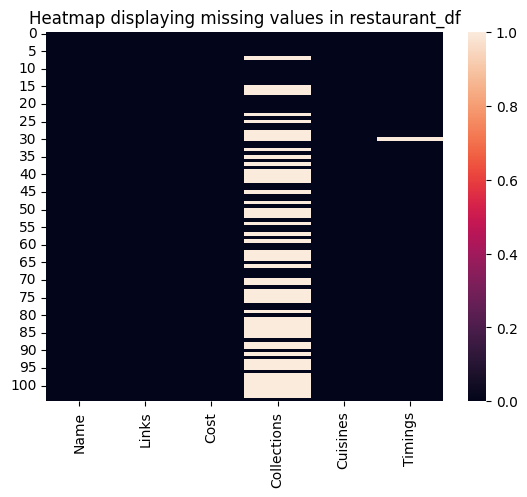

In [662]:
# Visualizing the missing values in restaurant_df
sns.heatmap(restaurant_df.isna()).set(title='Heatmap displaying missing values in restaurant_df')
plt.show()

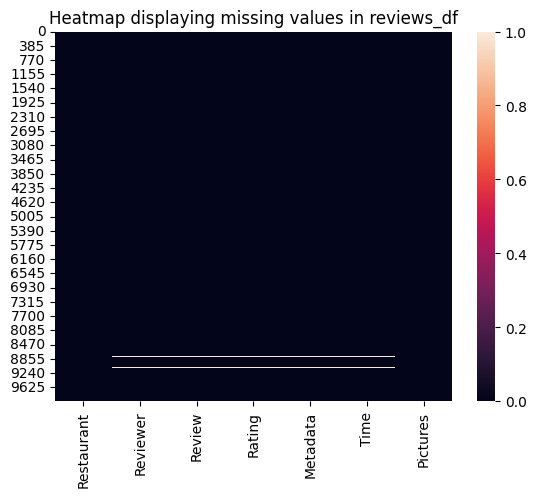

In [663]:
# Visualizing the missing values in reviews_df
sns.heatmap(reviews_df.isna()).set(title='Heatmap displaying missing values in reviews_df')
plt.show()

## ***2. Understanding Your Variables***

In [664]:
# Dataset Columns
# Displaying column names for the restaurant dataset
print('restaurant columns')
restaurant_df.columns

restaurant columns


Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [665]:
# Displaying column names for the reviews dataset
print('reviews columns')
reviews_df.columns

reviews columns


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [666]:
# Dataset Describe
# Displaying descriptive statistics for restaurant_df
restaurant_df.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

In [667]:
# Displaying descriptive statistics for reviews_df
reviews_df.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

### Variables Description

**variables description of restaurant_df:**<br>
Name : Name of Restaurants<br>

Links : URL Links of Restaurants<br>

Cost : Per person estimated cost of dining
<br>

Collection : Tagging of Restaurants w.r.t. Zomato categories<br>

Cuisines : Cuisines served by restaurants<br>

Timings : Restaurant timings<br>
<br>
**variables description of reviews_df:**<br>
Reviewer : Name of the reviewer<br>

review : Review text<br>

Rating : Rating provided<br>

MetaData : Reviewer metadata-No of reviews and followers<br>

Time : Date and Time of Review<br>

Pictures : No of pictures posted with review


### Check Unique Values for each variable.

In [668]:
# Check Unique Values for each variable.
# Check unique values for each variable in restaurants_df
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [669]:
# Check unique values for each variable in reviews_df
reviews_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

#***3.Data Wrangling***

### Data Wrangling Code

In [670]:
# Write your code to make your dataset analysis ready.
reviews_df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [671]:
reviews_df.loc[reviews_df['Rating']=='Like']=1


In [672]:
# Filling missing values in the 'Rating' column of 'reviews_df' with the median
reviews_df['Rating'].fillna(reviews_df['Rating'].median(),inplace=True)

In [673]:
#finding dupilcates in reviews_df
reviews_df[reviews_df.duplicated()]

Restaurant Reviewer Review Rating Metadata Time  Pictures
8778  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8779  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8780  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8781  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8782  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8783  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8784  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8785  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8786  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8787  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8788  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8789  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8790  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8791  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8792  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8793  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8794  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8795  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8796  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8797  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8798  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
8799  American Wild Wings      NaN    NaN    4.0      NaN  NaN         0
9086         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9087         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9088         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9089         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9090         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9091         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9092         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9093         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9094         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9095         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9096         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9097         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9098         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0
9099         Arena Eleven      NaN    NaN    4.0      NaN  NaN         0

In [674]:
# Removing duplicate rows from 'reviews_df'
reviews=reviews_df.drop_duplicates(inplace=True)

In [675]:
# Checking for duplicate rows in the 'restaurant_df' dataset
restaurant_df.duplicated().sum()

0

In [676]:
# Calculating the percentage of missing values in the 'Collections' column
missing_percentage = ((restaurant_df['Collections'].isnull().sum()) / (len(restaurant_df['Collections']))) * 100

# Print the percentage of missing values in the 'Collections' column rounded to two decimal places.
print(f'Percentage of missing value in collections is {round(missing_percentage, 2)}%')

Percentage of missing value in collections is 51.43%


In [677]:
# Creating a copy of the 'restaurant_df' dataset
restaurants=restaurant_df.copy()

In [678]:
# Renaming the 'Name' column in 'restaurant_df' to 'Restaurant'
restaurant_df.rename(columns={'Name':'Restaurant'},inplace=True)

In [679]:
# Merging the 'restaurant_df' and 'reviews_df' datasets on the 'Restaurant' column
_merged_df=restaurant_df.merge(reviews_df,on='Restaurant')

In [680]:
# Renaming columns in the merged dataset
_merged_df.rename(columns={'Timings':'Restaurant_timings'},inplace=True)

In [681]:
# Checking for total number of restaurants in the merged dataset
print(_merged_df['Restaurant'].nunique(), 'restaurants are there in total' )

100 restaurants are there in total


In [682]:
# Finding the highest and lowest prices in the 'Cost' column
print('The highest price among the restaurants= ',_merged_df['Cost'].max())
print('The lowest price among the restaurants= ',_merged_df['Cost'].min())

The highest price among the restaurants=  900
The lowest price among the restaurants=  1,000


In [683]:
# removing commas in the 'Cost' column
_merged_df['Cost']=_merged_df['Cost'].apply(lambda x:x.replace(',',''))

In [684]:
#converting 'Cost' column values to integer
_merged_df['Cost']=_merged_df['Cost'].astype(int)


In [685]:
# Converting the 'Rating' column to a float data type
_merged_df['Rating']=_merged_df['Rating'].astype('float')

In [686]:
# Counting the number of ratings for each rating value
_merged_df['Rating'].value_counts()

5.0    3832
4.0    2375
1.0    1735
3.0    1193
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [687]:
# Selecting costly restaurants with a cost greater than 1000
costly_restaurants=_merged_df[_merged_df['Cost']>1000].reset_index()
costly_restaurants.head()

index Restaurant                                              Links  Cost  \
0    200   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
1    201   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
2    202   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3    203   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
4    204   Flechazo  https://www.zomato.com/hyderabad/flechazo-gach...  1300   

                          Collections  \
0  Great Buffets, Hyderabad's Hottest   
1  Great Buffets, Hyderabad's Hottest   
2  Great Buffets, Hyderabad's Hottest   
3  Great Buffets, Hyderabad's Hottest   
4  Great Buffets, Hyderabad's Hottest   

                                       Cuisines  \
0  Asian, Mediterranean, North Indian, Desserts   
1  Asian, Mediterranean, North Indian, Desserts   
2  Asian, Mediterranean, North Indian, Desserts   
3  Asian, Mediterranean, North Indian, Desserts   
4  Asian, Mediterranean, North Indian, Desserts   

                      Restaurant_timings          Reviewer  \
0  11:30 AM to 4:30 PM, 6:30 PM to 11 PM     Vivek Vuppala   
1  11:30 AM to 4:30 PM, 6:30 PM to 11 PM       Jalaj Goyal   
2  11:30 AM to 4:30 PM, 6:30 PM to 11 PM        Teju Winni   
3  11:30 AM to 4:30 PM, 6:30 PM to 11 PM    Karthik Chanda   
4  11:30 AM to 4:30 PM, 6:30 PM to 11 PM  Samujjwal Baruah   

                                              Review  Rating  \
0  We were 4 people who visited this place on Thu...     2.0   
1  Here is one of the best buffet places for team...     4.0   
2  Starters were very tastiest. Good place to cho...     5.0   
3  Best Restaurant with great food, Satyajit & Te...     5.0   
4  Would have rated 6, +1 for the music, had it n...     5.0   

                    Metadata             Time  Pictures  
0   2 Reviews , 40 Followers  5/24/2019 21:17         0  
1  16 Reviews , 71 Followers  5/24/2019 15:09         3  
2                   1 Review  5/23/2019 14:59         0  
3                   1 Review  5/22/2019 23:18         0  
4    2 Reviews , 2 Followers  5/22/2019 16:01         0

In [688]:
# Counting the number of costly restaurants
print('there are',costly_restaurants['Restaurant'].nunique(),'costly restaurants')

there are 31 costly restaurants


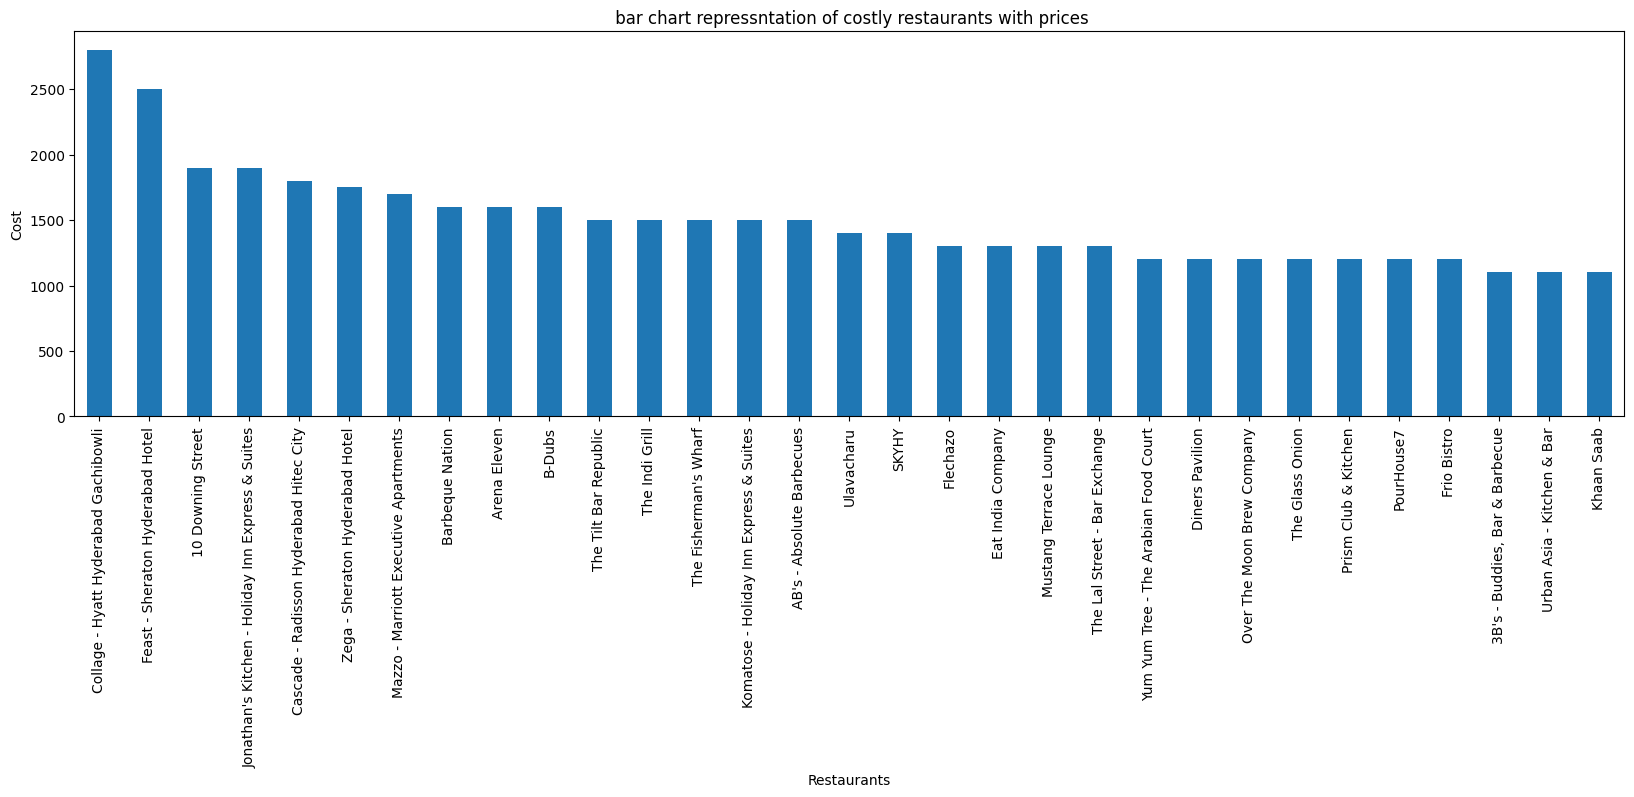

In [689]:
# Creating a bar chart of costly restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart repressntation of costly restaurants with prices')
costly_restaurants.groupby(costly_restaurants['Restaurant'])['Cost'].max().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [690]:
# Listing the top 5 costly restaurants
top5_costlty_restaurants=['Collage - Hyatt Hyderabad Gachibowli','Feast - Sheraton Hyderabad Hotel','10 Downing Street',"Jonathan's Kitchen - Holiday Inn Express & Suites",'Cascade - Radisson Hyderabad Hitec City']
print('the top 5 costly restaurants are:',top5_costlty_restaurants)


the top 5 costly restaurants are: ['Collage - Hyatt Hyderabad Gachibowli', 'Feast - Sheraton Hyderabad Hotel', '10 Downing Street', "Jonathan's Kitchen - Holiday Inn Express & Suites", 'Cascade - Radisson Hyderabad Hitec City']


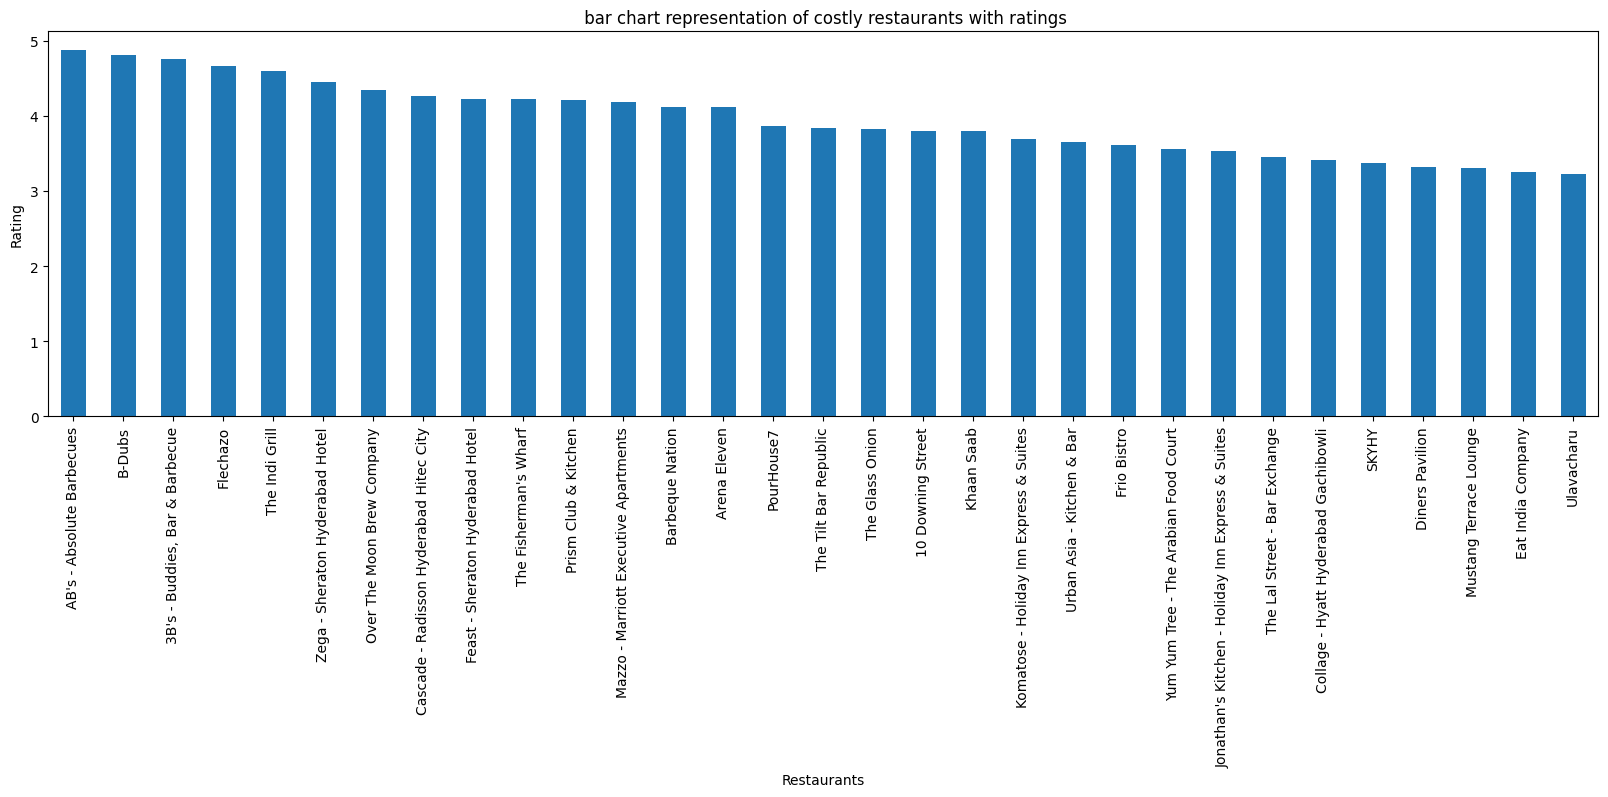

In [691]:
# Creating a bar chart of costly restaurants with ratings
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of costly restaurants with ratings')
costly_restaurants.groupby(costly_restaurants['Restaurant'])['Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.show()

In [692]:
# Calculating the average rating of costly restaurants
print('the average rating of costly restaurants=',round(costly_restaurants['Rating'].mean(),2))

the average rating of costly restaurants= 3.95


In [694]:
# Selecting budget-friendly restaurants with a cost equal to and below 1000
budget_friendly_restaurants=_merged_df[_merged_df['Cost']<=1000]
budget_friendly_restaurants.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                              Restaurant_timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [695]:
# Calculating the average cost of budget-friendly restaurants
print('the average cost of budget_friendly_restaurants=',round(budget_friendly_restaurants['Cost'].mean(),2))

the average cost of budget_friendly_restaurants= 592.04


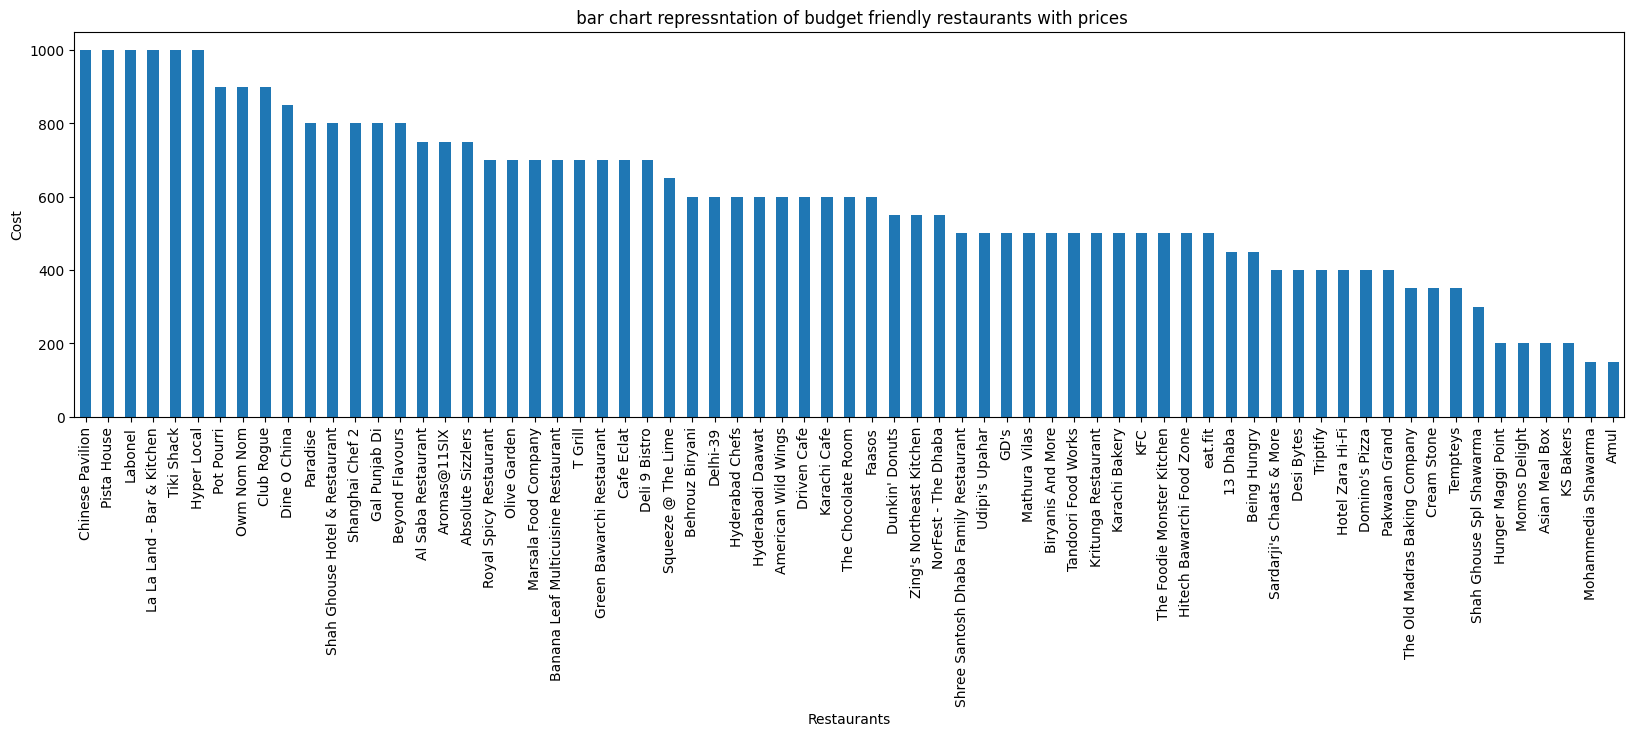

In [696]:
# Creating a bar chart of budget-friendly restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart repressntation of budget friendly restaurants with prices')
budget_friendly_restaurants.groupby(budget_friendly_restaurants['Restaurant'])['Cost'].max().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [697]:
# Counting the number of costly restaurants
print('there are',budget_friendly_restaurants['Restaurant'].nunique(),'budget friendly restaurants')

there are 69 budget friendly restaurants


In [698]:
# Calculating the average rating of budget-friendly restaurants
print('the average rating of budget_friendly restaurants=',round(budget_friendly_restaurants['Rating'].mean(),2))

the average rating of budget_friendly restaurants= 3.45


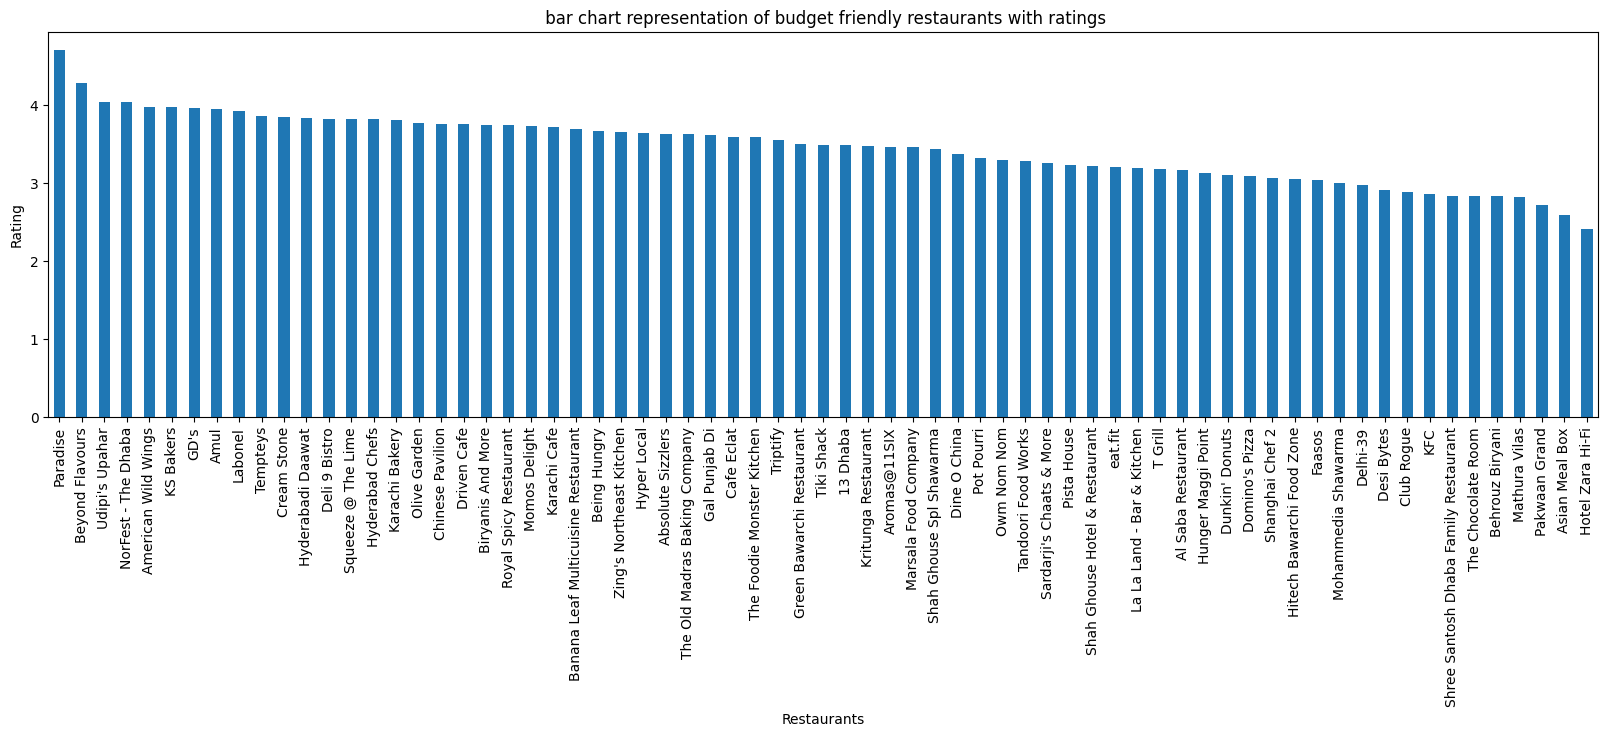

In [699]:
# Creating a bar chart of budget-friendly restaurants with ratings
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of budget friendly restaurants with ratings')
budget_friendly_restaurants.groupby(budget_friendly_restaurants['Restaurant'])['Rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.show()

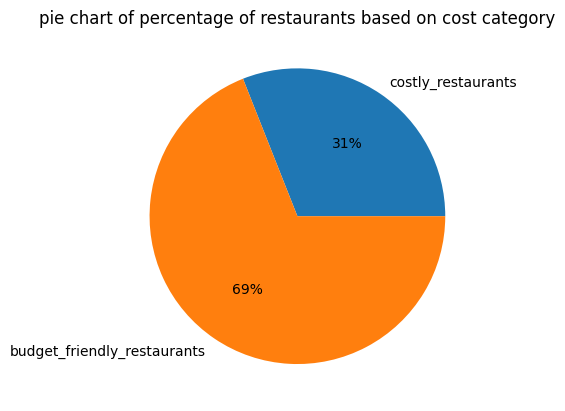

In [717]:
#creating pie chart for count of restaurants based on cost_category
cost_category=[31,69]
my_label=['costly_restaurants','budget_friendly_restaurants']
plt.title('pie chart of percentage of restaurants based on cost category')
plt.pie(cost_category,labels=my_label,autopct='%.0f%%')
plt.show()

In [702]:
# Creating a dictionary of average ratings for each restaurant
restaurants_rating=dict(_merged_df.groupby(_merged_df['Restaurant'])['Rating'].mean().round(1))

restaurants_rating

{'10 Downing Street': 3.8,
 '13 Dhaba': 3.5,
 "3B's - Buddies, Bar & Barbecue": 4.8,
 "AB's - Absolute Barbecues": 4.9,
 'Absolute Sizzlers': 3.6,
 'Al Saba Restaurant': 3.2,
 'American Wild Wings': 4.0,
 'Amul': 3.9,
 'Arena Eleven': 4.1,
 'Aromas@11SIX': 3.5,
 'Asian Meal Box': 2.6,
 'B-Dubs': 4.8,
 'Banana Leaf Multicuisine Restaurant': 3.7,
 'Barbeque Nation': 4.1,
 'Behrouz Biryani': 2.8,
 'Being Hungry': 3.7,
 'Beyond Flavours': 4.3,
 'Biryanis And More': 3.7,
 'Cafe Eclat': 3.6,
 'Cascade - Radisson Hyderabad Hitec City': 4.3,
 'Chinese Pavilion': 3.7,
 'Club Rogue': 2.9,
 'Collage - Hyatt Hyderabad Gachibowli': 3.4,
 'Cream Stone': 3.8,
 'Delhi-39': 3.0,
 'Deli 9 Bistro': 3.8,
 'Desi Bytes': 2.9,
 'Dine O China': 3.4,
 'Diners Pavilion': 3.3,
 "Domino's Pizza": 3.1,
 'Driven Cafe': 3.7,
 "Dunkin' Donuts": 3.1,
 'Eat India Company': 3.3,
 'Faasos': 3.0,
 'Feast - Sheraton Hyderabad Hotel': 4.2,
 'Flechazo': 4.7,
 'Frio Bistro': 3.6,
 "GD's": 4.0,
 'Gal Punjab Di': 3.6,
 'Green B

In [703]:
# Updating the 'Rating' column in the merged dataset with the average ratings
_merged_df['Rating']=_merged_df['Restaurant'].map(restaurants_rating)
_merged_df.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                              Restaurant_timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     4.3   
1  Ambience is too good for a pleasant evening. S...     4.3   
2  A must try.. great food great ambience. Thnx f...     4.3   
3  Soumen das and Arun was a great guy. Only beca...     4.3   
4  Food is good.we ordered Kodi drumsticks and ba...     4.3   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [704]:
# Selecting top-rated restaurants with a rating greater than 4
top_rated_restaurants=_merged_df[_merged_df['Rating']>4]
top_rated_restaurants.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                              Restaurant_timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     4.3   
1  Ambience is too good for a pleasant evening. S...     4.3   
2  A must try.. great food great ambience. Thnx f...     4.3   
3  Soumen das and Arun was a great guy. Only beca...     4.3   
4  Food is good.we ordered Kodi drumsticks and ba...     4.3   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

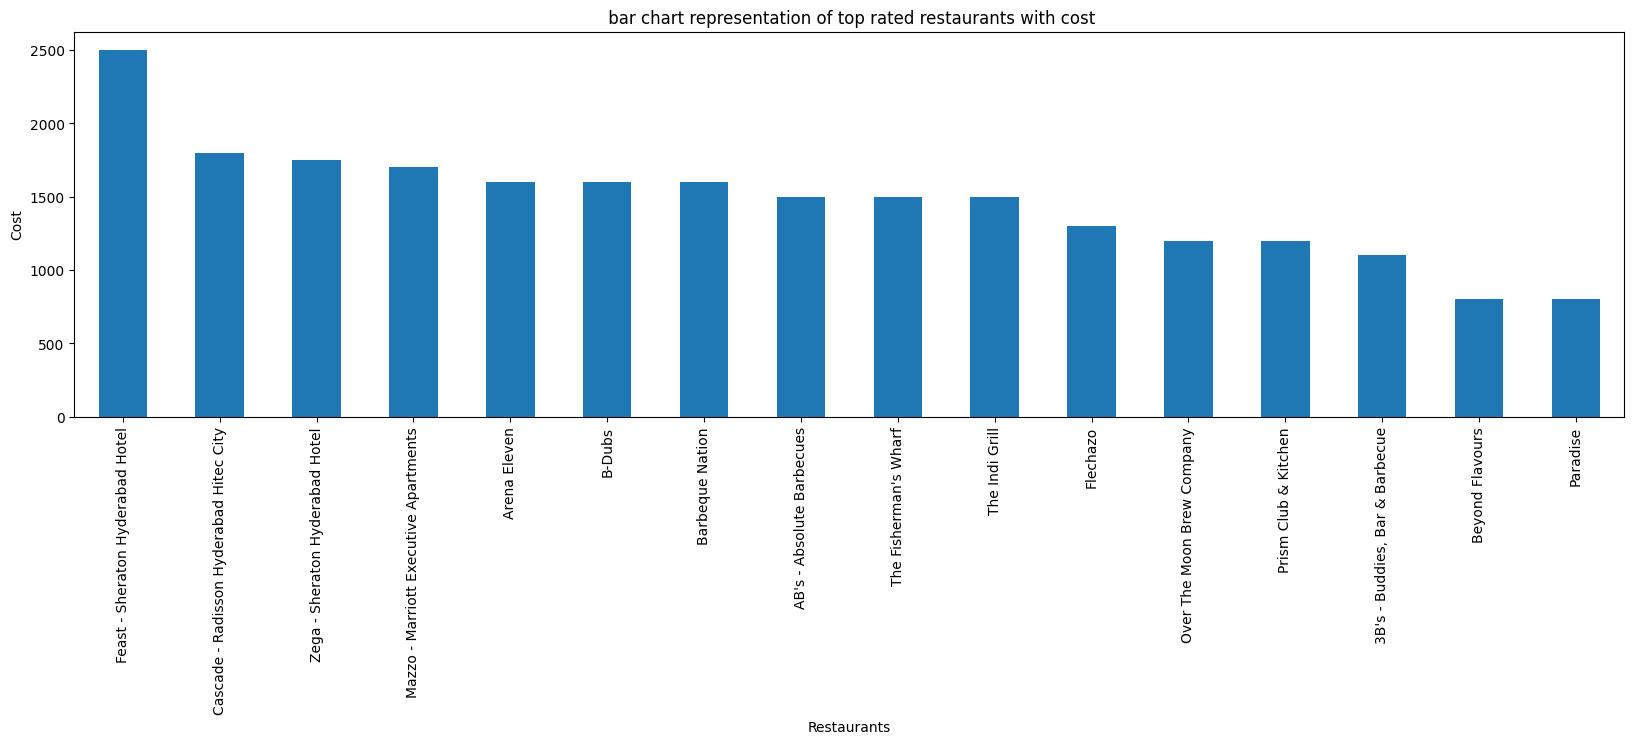

In [705]:
# Creating a bar chart of top-rated restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of top rated restaurants with cost')
top_rated_restaurants.groupby(top_rated_restaurants['Restaurant'])['Cost'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [706]:
# Counting the number of top-rated restaurants
print('there are',top_rated_restaurants['Restaurant'].nunique(),'top rated restaurants')

there are 16 top rated restaurants


In [707]:
# Selecting good-rated restaurants with a rating between 3 and 4
good_rated_restaurants=_merged_df[(_merged_df['Rating']>3)&(_merged_df['Rating']<=4)]
good_rated_restaurants.head()

Restaurant  \
300  Shah Ghouse Hotel & Restaurant   
301  Shah Ghouse Hotel & Restaurant   
302  Shah Ghouse Hotel & Restaurant   
303  Shah Ghouse Hotel & Restaurant   
304  Shah Ghouse Hotel & Restaurant   

                                                 Links  Cost  \
300  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
301  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
302  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
303  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
304  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   

                Collections  \
300  Late Night Restaurants   
301  Late Night Restaurants   
302  Late Night Restaurants   
303  Late Night Restaurants   
304  Late Night Restaurants   

                                              Cuisines Restaurant_timings  \
300  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   
301  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   
302  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   
303  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   
304  Biryani, North Indian, Chinese, Seafood, Bever...    12 Noon to 2 AM   

            Reviewer                                             Review  \
300     Ashwi Sharma  Haleem, the best place to try out.\nAvaialble ...   
301  Dasthagir Shaik  Ordered Chicken Fried rice. Very good; however...   
302     Ram Chowdary  Wonderful place with good food taste i like th...   
303        Avn Patro  This time I have experienced Mandi it's very n...   
304            Vinay  Nice taste of Biryani, and the price was also ...   

     Rating                 Metadata             Time  Pictures  
300     3.2  10 Reviews , 1 Follower  5/25/2019 18:32         0  
301     3.2                 1 Review  5/24/2019 21:48         0  
302     3.2                 1 Review  5/24/2019 18:37         0  
303     3.2                 1 Review  5/24/2019 17:33         0  
304     3.2                 1 Review   5/24/2019 3:01         0

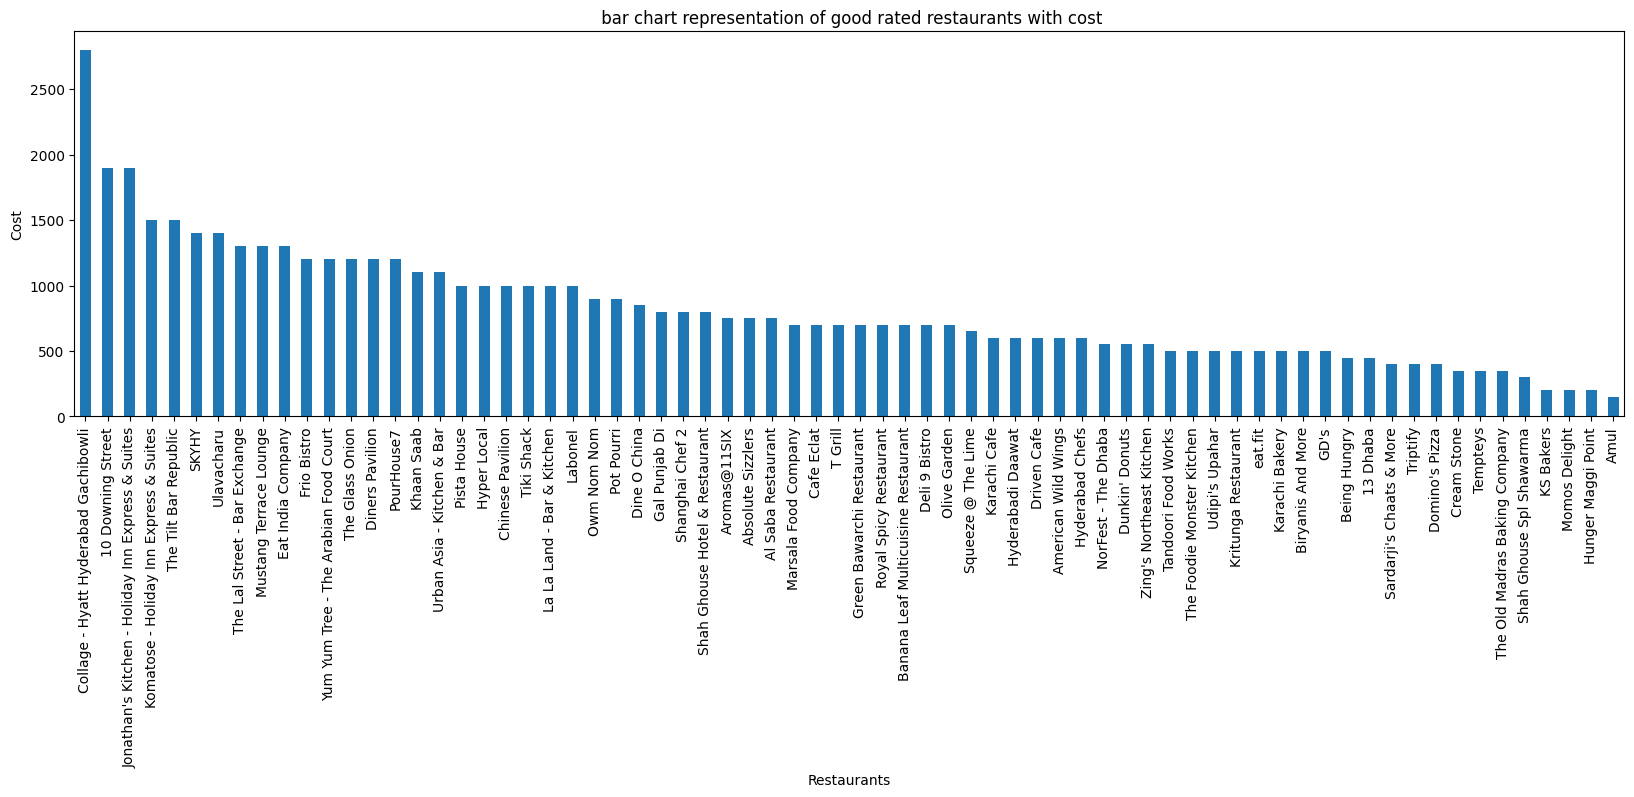

In [708]:
# Creating a bar chart of good-rated restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of good rated restaurants with cost')
good_rated_restaurants.groupby(good_rated_restaurants['Restaurant'])['Cost'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

In [709]:
# Counting the number of good-rated restaurants
print('there are',good_rated_restaurants['Restaurant'].nunique(),'good_rated restaurants')

there are 70 good_rated restaurants


In [710]:
# Selecting low-rated restaurants with a rating less than 3
low_rated_restaurants=_merged_df[_merged_df['Rating']<3]
low_rated_restaurants.head()

Restaurant                                            Links  Cost  \
1500        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   
1501        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   
1502        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   
1503        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   
1504        KFC  https://www.zomato.com/hyderabad/kfc-gachibowli   500   

     Collections           Cuisines Restaurant_timings            Reviewer  \
1500         NaN  Burger, Fast Food     11 AM to 11 PM       Kirthi Kirthi   
1501         NaN  Burger, Fast Food     11 AM to 11 PM        Amrita Sahoo   
1502         NaN  Burger, Fast Food     11 AM to 11 PM  Atei Jenny Uo Chon   
1503         NaN  Burger, Fast Food     11 AM to 11 PM    BABA RIYAZ SHAIK   
1504         NaN  Burger, Fast Food     11 AM to 11 PM               Tiger   

                                                 Review  Rating  \
1500  Good atmosphere to eat with relax.tastes good....     2.8   
1501  Ordered zinger doubles and hot and crispy chic...     2.8   
1502  No words very very very bad service I ever had...     2.8   
1503  chicken peaces not frided properally....and qu...     2.8   
1504  Burger was okay....But the chicken piece was n...     2.8   

                      Metadata             Time  Pictures  
1500   10 Reviews , 1 Follower  5/22/2019 17:21         0  
1501                 8 Reviews  5/18/2019 20:52         0  
1502  12 Reviews , 8 Followers   5/15/2019 1:48         0  
1503                  1 Review   5/8/2019 21:11         1  
1504     1 Review , 1 Follower   5/4/2019 21:47         0

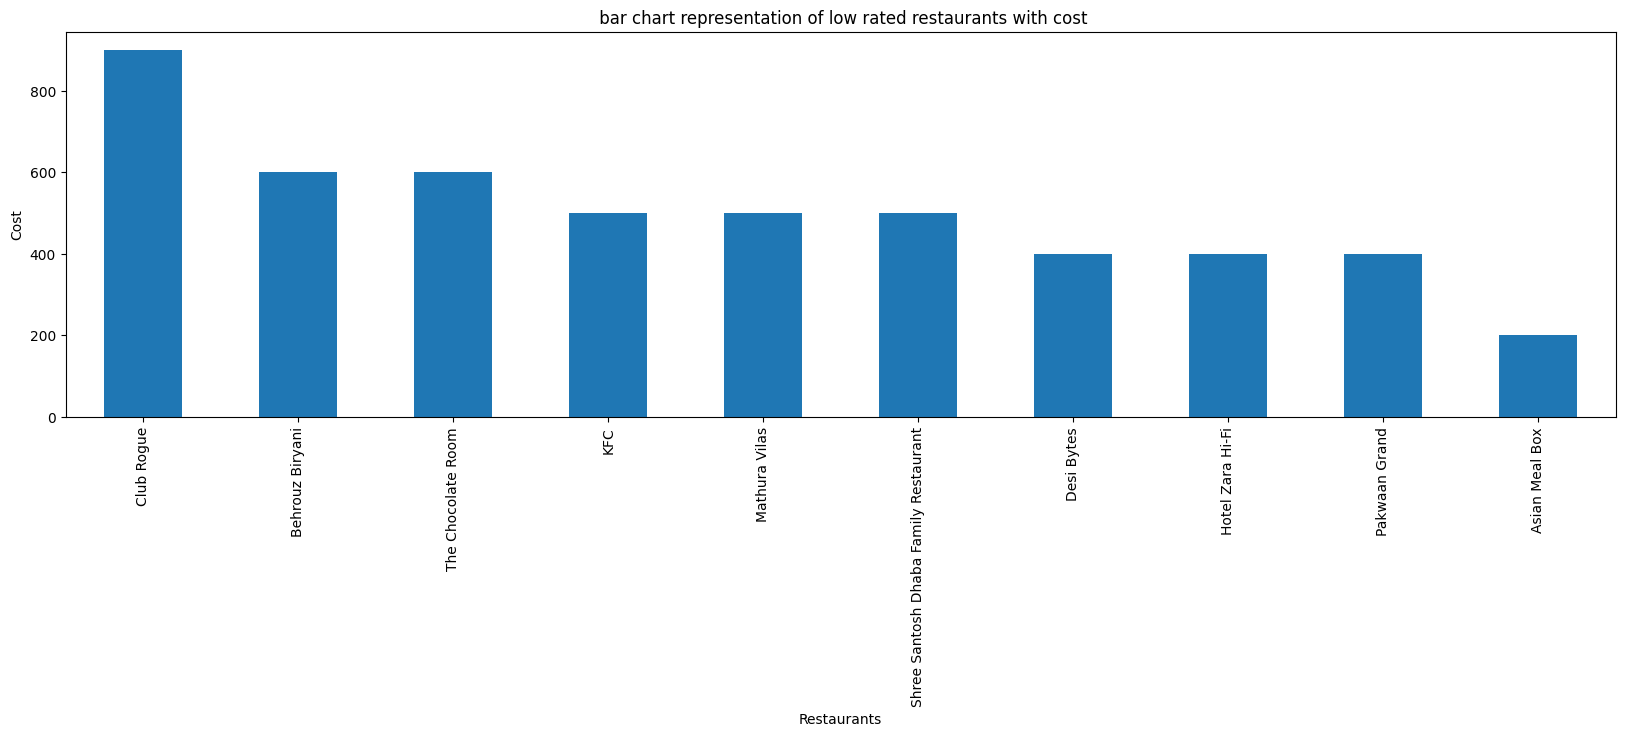

In [711]:
# Creating a bar chart of low-rated restaurants with prices
plt.figure(figsize=(20,5))
plt.title(' bar chart representation of low rated restaurants with cost')
low_rated_restaurants.groupby(low_rated_restaurants['Restaurant'])['Cost'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Restaurants')
plt.ylabel('Cost')
plt.show()

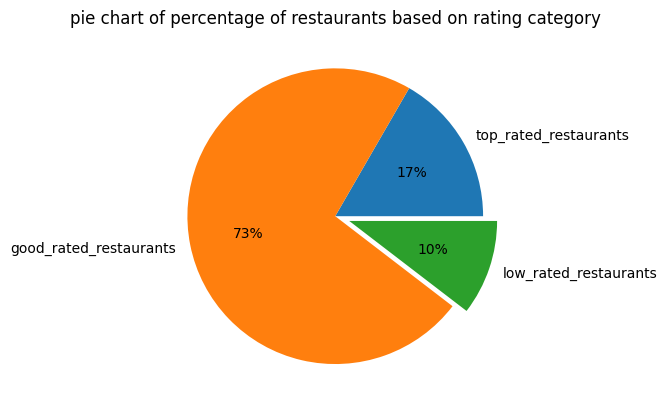

In [876]:
#creating pie chart for count of restaurants based on rating_category
rating_category=[16,70,10]
my_label=['top_rated_restaurants','good_rated_restaurants','low_rated_restaurants']
plt.title('pie chart of percentage of restaurants based on rating category')
my_explode=[0,0.1,0]
plt.pie(rating_category,labels=my_label,explode=my_explode,autopct='%.0f%%')
plt.show()

In [719]:
# Counting the number of unique reviewers who have reviewed the restaurants
print(_merged_df['Reviewer'].nunique(),' reviewers have reviewed the restaurants')
_merged_df['Reviewer'].value_counts()

7446  reviewers have reviewed the restaurants


Ankita              13
Parijat Ray         13
Kiran               12
Jay Mehta           11
Vedant Killa        11
                    ..
Anjana Dandekar      1
Shailesh Agarwal     1
Vinaya Chekuri       1
Sonal Ambani         1
Bhargava Krishna     1
Name: Reviewer, Length: 7446, dtype: int64

In [720]:
# Counting the number of reviews by each reviewer
_merged_df.isna().sum()

Restaurant               0
Links                    0
Cost                     0
Collections           4999
Cuisines                 0
Restaurant_timings     100
Reviewer                 2
Review                   9
Rating                   0
Metadata                 2
Time                     2
Pictures                 0
dtype: int64

from the above cell we can observe that most of the restaurants were reviewed.This helps restaurants to improve.

### What all manipulations have you done and insights you found?

Changed datatypes of columns, Filtered restaurants based on cost and ratings and created dataframes accordingly. found out number of values, unique values and value counts in each column.<br> Also merged both the dataframes. Null values exist in both the datasets and they will be managed accordingly. good_rated_restaurants and budget_friendly_restaurants are more in number.





### Reviews

In [721]:
#checking for irrelavent data
reviews_df[reviews_df['Restaurant']==1]

Restaurant Reviewer Review Rating Metadata Time  Pictures
7601          1        1      1      1        1    1         1

In [722]:
#creating a copy of reviews_df
review = reviews_df.drop(7601)
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [723]:
# Convert the 'Rating' column in the 'review' DataFrame to float data type.
review['Rating'] = review['Rating'].astype('float')
# Replace any rows in the 'Rating' column with a value of 0 with the median of the 'Rating' column.
review.loc[review['Rating'] == 0] = review.Rating.median()

In [724]:
# Get unique values in the 'Metadata' column to understand the distinct values present in column.
review['Metadata'].unique()

array(['1 Review , 2 Followers', '3 Reviews , 2 Followers',
       '2 Reviews , 3 Followers', ..., '65 Reviews , 423 Followers',
       '13 Reviews , 144 Followers', '472 Reviews , 1302 Followers'],
      dtype=object)

In [725]:
# Get unique values in the 'Time' column to understand the distinct values present in column.
review['Time'].unique()

array(['5/25/2019 15:54', '5/25/2019 14:20', '5/24/2019 22:54', ...,
       '6/3/2016 10:37', '5/31/2016 17:22', '5/31/2016 16:41'],
      dtype=object)

In [726]:
#Finding the hotels with No reviews
hotel_without_review = [name for name in restaurants.Name.unique().tolist() if name not in review.Restaurant.unique().tolist()]

hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [727]:
# Convert the 'Time' column in the 'review' DataFrame to a datetime format using the specified date and time format.
review['Time']  = pd.to_datetime(review['Time'],format='%m/%d/%Y %H:%M')


In [728]:
# Split the 'Metadata' column into two separate columns, 'Reviewer_Total_Review' and 'Review_Followers', based on the comma (',') separator.
review[['Reviewer_Total_Review', 'Review_Followers']] = review['Metadata'].str.split(',', n=1, expand=True)
# Extract and convert the numeric part of 'Reviewer_Total_Review' and 'Review_Followers' columns as separate numeric columns.
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Review_Followers'].str.split(' ').str[1])
# Reconvert the 'Time' column to datetime format (this step is redundant and can be removed).
review['Time'] = pd.to_datetime(review['Time'])
# Extract year, month, day, and hour from the 'Time' column and store them in separate columns.
review['Review_year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Day'] = pd.DatetimeIndex(review['Time']).day
review['Review_Hour']  = pd.DatetimeIndex(review['Time']).hour

In [729]:
# Display the first few rows of the modified 'review' DataFrame to inspect the changes.
review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review Review_Followers  Reviewer_Followers  Review_year  \
0                    1.0      2 Followers                 2.0       2019.0   
1                    3.0      2 Followers                 2.0       2019.0   
2                    2.0      3 Followers                 3.0       2019.0   
3                    1.0       1 Follower                 1.0       2019.0   
4                    3.0      2 Followers                 2.0       2019.0   

   Review_Month  Review_Day  Review_Hour  
0           5.0        25.0         15.0  
1           5.0        25.0         14.0  
2           5.0        24.0         22.0  
3           5.0        24.0         22.0  
4           5.0        24.0         21.0

In [730]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
                                                       'Reviewer_Followers':'max',
                                                       'Rating':'mean'}).rename(columns = {'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers',ascending = False).reset_index()

most_followed_reviewer[:5]

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
0    Satwinder Singh                  186.0             13410.0   
1         Eat_vth_me                   60.0             13320.0   
2       Samar Sardar                    8.0             11329.0   
3  Foodies Hyderabad                   31.0              9494.0   
4           Srinivas                   34.0              7628.0   

   Average_Rating_Given  
0              3.666667  
1              5.000000  
2              3.500000  
3              4.500000  
4              3.714286

In [731]:
#Finding on which year there is a Maximum Engagment
hotel_year = review.groupby('Review_year')['Restaurant'].apply(lambda x:x.tolist()).reset_index()
hotel_year['Count'] = hotel_year['Restaurant'].apply(lambda x: len(x))

hotel_year

Review_year                                         Restaurant  Count
0       2016.0  [Labonel, Labonel, Labonel, Labonel, Labonel, ...     43
1       2017.0  [KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...    213
2       2018.0  [Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...   4903
3       2019.0  [Beyond Flavours, Beyond Flavours, Beyond Flav...   4802

In [732]:
#merging both Data Frame
hotel = restaurant_df.rename(columns = {'Name':'Restaurant'})
merged = restaurant_df.merge(review, on = 'Restaurant')
merged.shape

(9963, 19)

In [733]:
# Display the first few rows of the modified 'merged' DataFrame to inspect the changes.
merged.head()

Restaurant                                              Links Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...  800   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1  Food Hygiene Rated Restaurants in Hyderabad, C...   
2  Food Hygiene Rated Restaurants in Hyderabad, C...   
3  Food Hygiene Rated Restaurants in Hyderabad, C...   
4  Food Hygiene Rated Restaurants in Hyderabad, C...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata                Time  Pictures  \
0   1 Review , 2 Followers 2019-05-25 15:54:00         0   
1  3 Reviews , 2 Followers 2019-05-25 14:20:00         0   
2  2 Reviews , 3 Followers 2019-05-24 22:54:00         0   
3    1 Review , 1 Follower 2019-05-24 22:11:00         0   
4  3 Reviews , 2 Followers 2019-05-24 21:37:00         0   

   Reviewer_Total_Review Review_Followers  Reviewer_Followers  Review_year  \
0                    1.0      2 Followers                 2.0       2019.0   
1                    3.0      2 Followers                 2.0       2019.0   
2                    2.0      3 Followers                 3.0       2019.0   
3                    1.0       1 Follower                 1.0       2019.0   
4                    3.0      2 Followers                 2.0       2019.0   

   Review_Month  Review_Day  Review_Hour  
0           5.0        25.0         15.0  
1           5.0        25.0         14.0  
2           5.0        24.0         22.0  
3           5.0        24.0         22.0  
4           5.0        24.0         21.0

## EDA

In [734]:
# Split the 'Cuisines' column into lists of cuisine names for each restaurant.
cuisine_value_list = hotel.Cuisines.str.split(', ')

# Initialize an empty dictionary to count the occurrences of each cuisine.
cuisine_dict = {}

# Iterate through the lists of cuisine names for each restaurant.
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        # Check if the cuisine is already in the dictionary; if so, increment its count, otherwise, initialize it to 1.
        if cuisine in cuisine_dict:
            cuisine_dict[cuisine] += 1
        else:
            cuisine_dict[cuisine] = 1

# Create a DataFrame from the cuisine dictionary, transpose it, and reset the index.
cuisines_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index': 'Cuisine', 0: 'Number of Restaurants'})

top_10_most_selling_cuisines = cuisines_df.sort_values('Number of Restaurants',ascending = False)[:10]

fig = px.pie(top_10_most_selling_cuisines,values = "Number of Restaurants",names = "Cuisine",title = 'Top 10 Most Selling Cuisines', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

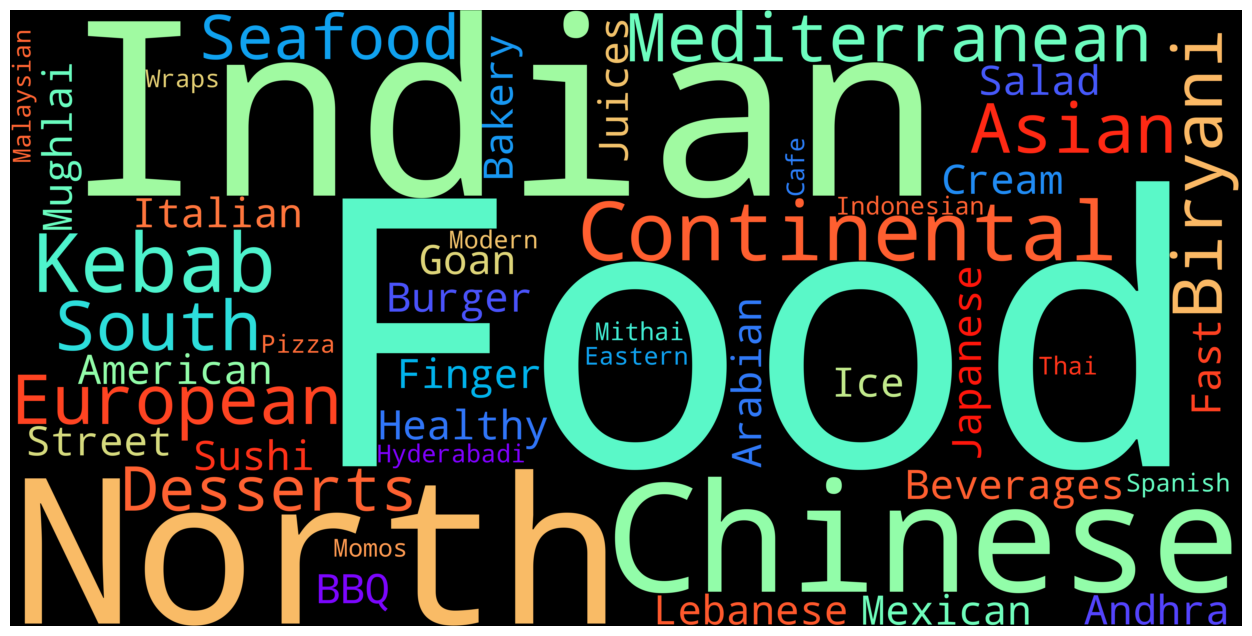

In [735]:
#WordCloud for Cuisines

plt.figure(figsize = (20,8))
text = " ".join(name for name in cuisines_df.Cuisine)

word_cloud = WordCloud(width = 6000,height = 3000,collocations = False,colormap = 'rainbow',background_color = 'black').generate(text)

plt.imshow(word_cloud,interpolation = 'bilinear');
plt.axis("off");

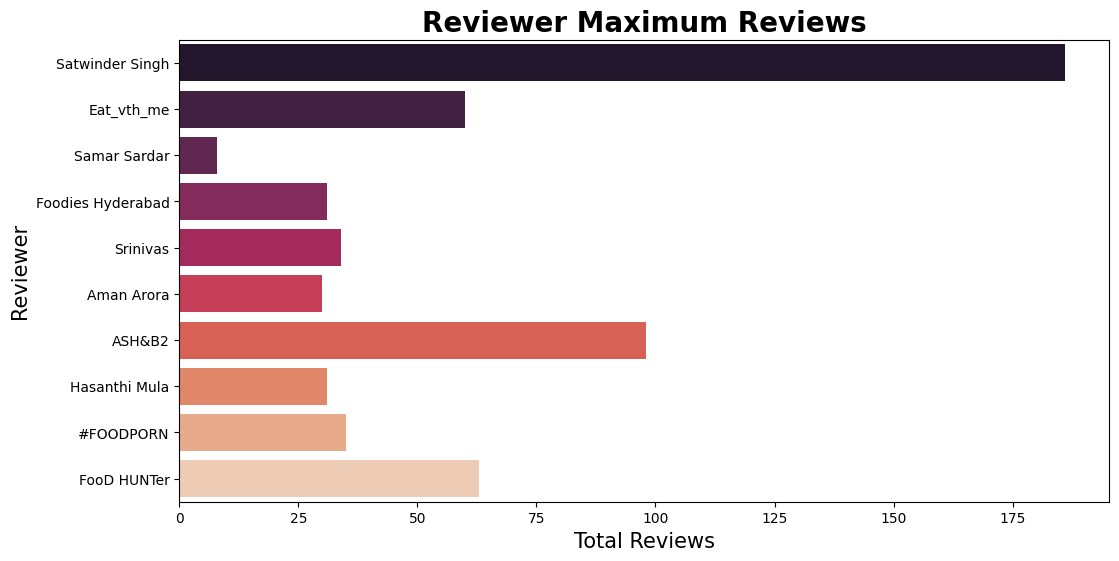

In [736]:
#plotting reviewers maximum number of reviews  using bar plot
plt.figure(figsize = (12,6))
sns.barplot(data = most_followed_reviewer[:10],x = 'Reviewer_Total_Review',y = 'Reviewer',palette = 'rocket')
plt.title('Reviewer Maximum Reviews',fontsize = 20,fontweight = 'bold')
plt.xlabel('Total Reviews',fontsize = 15)
plt.ylabel('Reviewer',fontsize = 15)
plt.show()

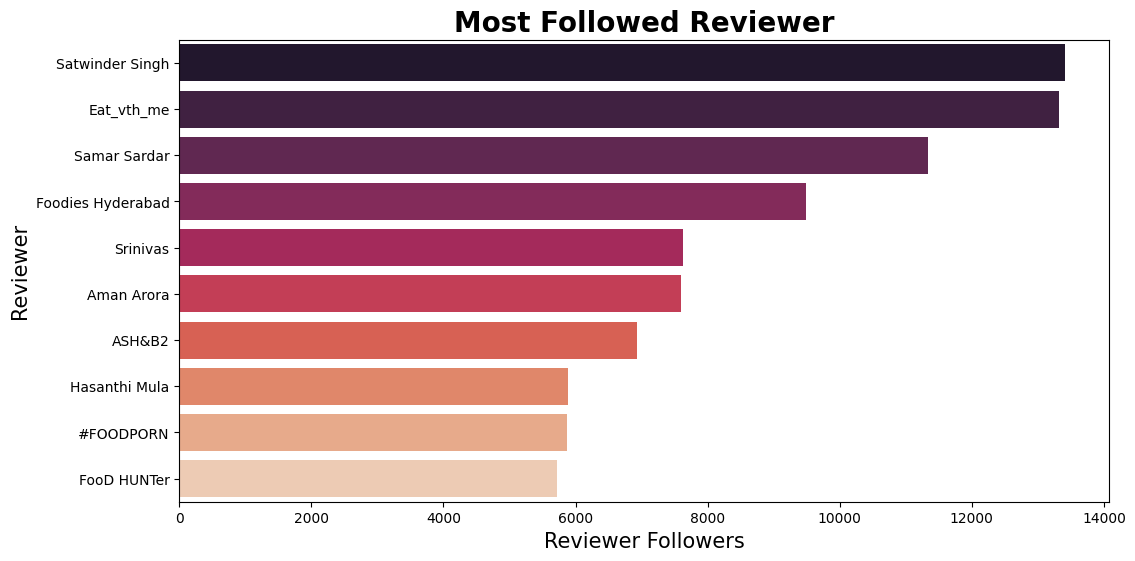

In [737]:
#plotting count of most followed reviewer  using bar plot
plt.figure(figsize = (12,6))
sns.barplot(data = most_followed_reviewer[:10],x = 'Reviewer_Followers',y = 'Reviewer',palette = 'rocket')
plt.title('Most Followed Reviewer',fontsize = 20,fontweight = 'bold')
plt.xlabel('Reviewer Followers',fontsize = 15)
plt.ylabel('Reviewer',fontsize = 15)
plt.show()

In [738]:
#veiwing most_followed_reviewer dataframe
most_followed_reviewer

Reviewer  Reviewer_Total_Review  Reviewer_Followers  \
0        Satwinder Singh                  186.0             13410.0   
1             Eat_vth_me                   60.0             13320.0   
2           Samar Sardar                    8.0             11329.0   
3      Foodies Hyderabad                   31.0              9494.0   
4               Srinivas                   34.0              7628.0   
...                  ...                    ...                 ...   
7441            Zomato 2                    1.0                 NaN   
7442     Ʀʌtʜoʀ Sɩŋʛʜ RT                    2.0                 NaN   
7443       Каоутар Тахри                    1.0                 NaN   
7444    দেবাশিষ মুখার্জি                    1.0                 NaN   
7445  ప్రత్యూష సూరేపల్లి                    1.0                 NaN   

      Average_Rating_Given  
0                 3.666667  
1                 5.000000  
2                 3.500000  
3                 4.500000  
4                 3.714286  
...                    ...  
7441              1.000000  
7442              5.000000  
7443              5.000000  
7444              5.000000  
7445              4.000000  

[7446 rows x 4 columns]

#**5.Hypothesis Testing**

* The cost of a Restaurant is positively correlated with the Rating it receives

* Restaurants that are reviewed by reviewers with more followers will have a higher rating

* Restaurants that offer a wider variety of cuisines will have a higher Restaurant cost.

* Restaurants that offer a wider variety of cuisines will have a higher rating.



###Hypothetical Statement - 1
---

The Cost of a restaurant is positively correlated with the rating it receives.


#### 1. Satate Your research hypothesis as an null hypothesis and alternate

* **Null hypothesis:** There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

* **Alternative hypothesis:** There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

* **Test:** Simple Linear Regressinon Analysis

In [739]:
#Perform Statistical Test to obtain P-value
import statsmodels.formula.api as smf

#fit the linear model
model = smf.ols(formula ='Rating ~ Cost',data = merged).fit()

#Check the P-value of coeffiecient
p_value = model.pvalues[1]
if p_value < 0.05:
  print("Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it recives.")
else:
  print("Fail to reject Null Hypothesis - There is a positive relationship between the cost of a restaurant and the rating it recives")


Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it recives.


### Hypothetical Statement - 2

---
Restaurants that are reviewed by reviewers with more followers will have a higher rating.

#### 1. Satate Your research hypothesis as an null hypothesis and alternate

* **Null hypothesis:** The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)

* **Alternative hypothesis:** Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)

* **Test:** Simple Linear Regression test

#### 2. Perform an appropriate statistical test.

In [740]:
# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data =merged).fit()

# print the summary of the model
# print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


### Hypothetical Statement - 3

---

Restaurants that offer a wider variety of cuisines will have a higher Restaurant cost.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* **Null hypothesis:** The variety of cuisines offered by a restaurant has no effect on its Restaurant Cost. (H0: 𝛽3 = 0)

* **Alternative hypothesis:** The variety of cuisines offered by a restaurant has a positive effect in Restaurant Cost. (H1: 𝛽3 > 0)

* **Test:** Chi-Squared Test

#### 2. Perform an appropriate statistical test.


In [741]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Cost'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


## **6.Feature Engineering and Data-Preprocessing**

### `Treating Duplicates`

In [742]:
# Display the first few rows of the restaurant_df DataFrame to inspect the changes.
restaurant_df.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [743]:
# Display the first few rows of the 'review' DataFrame to inspect the changes.
reviews_df.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

In [744]:
#creating a copy of restaurant_df
hotel = restaurant_df.copy()

In [745]:
# Convert the 'Time' column in the 'review' DataFrame to datetime format using the specified format.
review['Time'] = pd.to_datetime(review['Time'], format='%m/%d/%Y %H:%M')

# Split the 'Metadata' column into two separate columns based on the first comma (',').
review[['Reviewer_Total_Review', 'Review_Followers']] = review['Metadata'].str.split(',', n=1, expand=True)

# Extract the numeric part of 'Reviewer_Total_Review' and convert it to a numeric data type.
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])

# Extract the numeric part of 'Review_Followers' and convert it to a numeric data type.
review['Reviewer_Followers'] = pd.to_numeric(review['Review_Followers'].str.split(' ').str[1])

# Convert the 'Time' column to datetime format again (redundant conversion).
review['Time'] = pd.to_datetime(review['Time'])

# Extract the year from the 'Time' column and create a new 'Review_year' column.
review['Review_year'] = pd.DatetimeIndex(review['Time']).year

# Extract the month from the 'Time' column and create a new 'Review_Month' column.
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month

# Extract the day from the 'Time' column and create a new 'Review_Day' column.
review['Review_Day'] = pd.DatetimeIndex(review['Time']).day

# Extract the hour from the 'Time' column and create a new 'Review_Hour' column.
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

### `Treating Missing Values`

Restaurant Dataset

---

In [746]:
#checking for null values in hotel dataframe
hotel.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [747]:
# Identify rows in the 'hotel' DataFrame where the 'Timings' column is null (missing values).
hotel[hotel['Timings'].isnull()]

Restaurant                                              Links Cost  \
30  Pot Pourri  https://www.zomato.com/hyderabad/pot-pourri-ga...  900   

   Collections                            Cuisines Timings  
30         NaN  Andhra, South Indian, North Indian     NaN

In [748]:
# Fill the missing values in the 'Timings' column with the mode (most frequent value) of the 'Timings' column.
# The 'inplace=True' parameter ensures that the changes are made directly to the 'hotel' DataFrame.
hotel['Timings'].fillna(hotel['Timings'].mode()[0],inplace = True)

In [749]:
#Checking null values percentage in collections
missing_percentage = ((hotel['Collections'].isnull().sum())/(len(hotel['Collections'])))*100
print(f'Percentage of missing value in collections is {round(missing_percentage,2)}%')

Percentage of missing value in collections is 51.43%


In [750]:
#dropping collection column since has more than 50% of null values
hotel.drop('Collections', axis = 1, inplace = True)

In [751]:
#checking if null values exist in hotel dataframe
print(hotel.isnull().sum())


Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::


Review Dataset

---

In [752]:
#checking if null values exist in review dataframe
review.isnull().sum()

Restaurant                  0
Reviewer                    2
Review                      9
Rating                      0
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Review_Followers         1580
Reviewer_Followers       1580
Review_year                 2
Review_Month                2
Review_Day                  2
Review_Hour                 2
dtype: int64

In [753]:
# Identify rows in the 'review' DataFrame where the 'Reviewer' column is null (missing values).
review[review['Reviewer'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     4.0      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     4.0      NaN  NaT         0   

      Reviewer_Total_Review Review_Followers  Reviewer_Followers  Review_year  \
8777                    NaN              NaN                 NaN          NaN   
9085                    NaN              NaN                 NaN          NaN   

      Review_Month  Review_Day  Review_Hour  
8777           NaN         NaN          NaN  
9085           NaN         NaN          NaN

In [754]:
# Identify rows in the 'review' DataFrame where the 'Reviewer_Total_Review' column is null (missing values)
review[review['Reviewer_Total_Review'].isnull()]

Restaurant Reviewer Review  Rating Metadata Time  Pictures  \
8777  American Wild Wings      NaN    NaN     4.0      NaN  NaT         0   
9085         Arena Eleven      NaN    NaN     4.0      NaN  NaT         0   

      Reviewer_Total_Review Review_Followers  Reviewer_Followers  Review_year  \
8777                    NaN              NaN                 NaN          NaN   
9085                    NaN              NaN                 NaN          NaN   

      Review_Month  Review_Day  Review_Hour  
8777           NaN         NaN          NaN  
9085           NaN         NaN          NaN

In [755]:
# Drop rows in the 'review' DataFrame where either the 'Reviewer' or 'Reviewer_Total_Review' column has missing values.
review = review.dropna(subset = ['Reviewer','Reviewer_Total_Review'])

In [756]:
# Fill missing values in the 'Review' column with 'No Review' and in the 'Reviewer_Followers' column with 0.
review = review.fillna({'Review':'No Review','Reviewer_Followers':0})

In [757]:
# Drop the 'Review_Followers' column from the 'review' DataFrame.
review.drop('Review_Followers',axis = 1,inplace = True)

In [758]:
# Check and display the number of missing values in each column of the 'review' DataFrame.
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_year              0
Review_Month             0
Review_Day               0
Review_Hour              0
dtype: int64

In [759]:
#merging both dataset
_merged_df = hotel.merge(review, on = 'Restaurant')
_merged_df.shape

(9961, 17)

In [760]:
# Remove commas and convert the 'Cost' column in the '_merged_df' DataFrame to integers.
_merged_df['Cost']=_merged_df['Cost'].apply(lambda x:x.replace(',',''))

In [761]:
#converting 'Cost' column values to integer
_merged_df['Cost']=_merged_df['Cost'].astype(int)


In [762]:
# Remove commas from the 'Cost' column in the 'hotel' DataFrame and convert it to an integer data type.
hotel['Cost']=hotel['Cost'].apply(lambda x:x.replace(',',''))
hotel['Cost']=hotel['Cost'].astype(int)


###2. Handling Outliers

#### Detecting Anamoly

In [763]:
# Display unique values in the 'Cost' column of the '_merged_df' DataFrame, which shows the different cost ranges.
_merged_df['Cost'].unique()

array([ 800, 1300, 1200, 1500,  500,  300, 1000,  350,  400, 1600,  750,
        550, 1900,  450,  150, 1400, 1100,  600,  200,  900,  700, 1700,
       2500,  850,  650, 1800, 2800, 1750])

In [764]:
# Display summary information about the '_merged_df' DataFrame, including data types and non-null counts.
_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Restaurant             9961 non-null   object        
 1   Links                  9961 non-null   object        
 2   Cost                   9961 non-null   int64         
 3   Cuisines               9961 non-null   object        
 4   Timings                9961 non-null   object        
 5   Reviewer               9961 non-null   object        
 6   Review                 9961 non-null   object        
 7   Rating                 9961 non-null   float64       
 8   Metadata               9961 non-null   object        
 9   Time                   9961 non-null   datetime64[ns]
 10  Pictures               9961 non-null   int64         
 11  Reviewer_Total_Review  9961 non-null   float64       
 12  Reviewer_Followers     9961 non-null   float64       
 13  Rev

In [765]:
# Import the Isolation Forest model from the scikit-learn library for anomaly detection.
from sklearn.ensemble import IsolationForest

# Calculate and print skewness and kurtosis statistics for the 'Cost' and 'Reviewer_Followers' columns.
# Skewness measures the asymmetry of the data distribution, while kurtosis quantifies the shape of the distribution.
print("Skewness - Cost: %f" % _merged_df['Cost'].skew())
print("Kurtosis - Cost: %f" % _merged_df['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % _merged_df['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % _merged_df['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


In [766]:
#IsolationForest for anomaly detection on Cost feature

isolation_forest = IsolationForest(n_estimators = 100,contamination = 0.01)
isolation_forest.fit(_merged_df['Cost'].values.reshape(-1,1))
_merged_df['anomaly_score_univariate_cost'] = isolation_forest.decision_function(_merged_df['Cost'].values.reshape(-1,1))
_merged_df['outlier_univariate_cost'] = isolation_forest.predict(_merged_df['Cost'].values.reshape(-1,1))

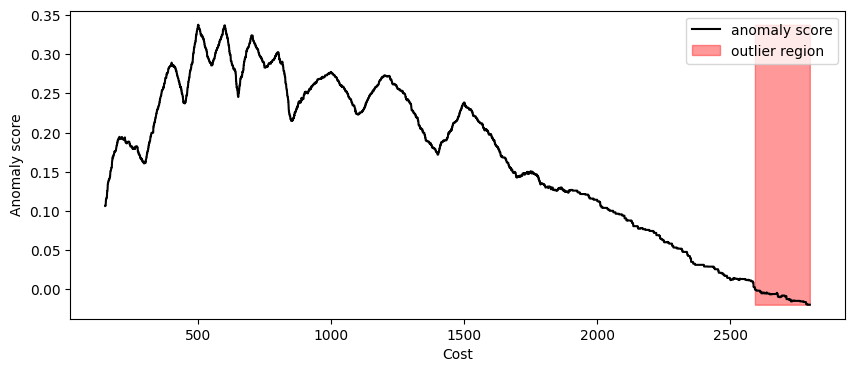

In [767]:
#chart to visualize outliers
xx = np.linspace(_merged_df['Cost'].min(),_merged_df['Cost'].max(),len(_merged_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize = (10,4))
plt.plot(xx,anomaly_score,label= 'anomaly score',color = 'black')
plt.fill_between(xx.T[0],np.min(anomaly_score),np.max(anomaly_score),where = outlier == -1,color = 'red',alpha = .4,label = 'outlier region')
plt.legend()
plt.ylabel('Anomaly score')
plt.xlabel('Cost')
plt.show()

In [768]:
#IsolationForest for Anomaly detiction for reviewer follower

isolation_forest = IsolationForest(n_estimators = 100,contamination = 0.01)
isolation_forest.fit(_merged_df['Reviewer_Followers'].values.reshape(-1,1))
_merged_df['anomaly_score_univariate_follower'] = isolation_forest.decision_function(_merged_df['Reviewer_Followers'].values.reshape(-1,1))
_merged_df['outlier_univariate_follower'] = isolation_forest.predict(_merged_df['Reviewer_Followers'].values.reshape(-1,1))

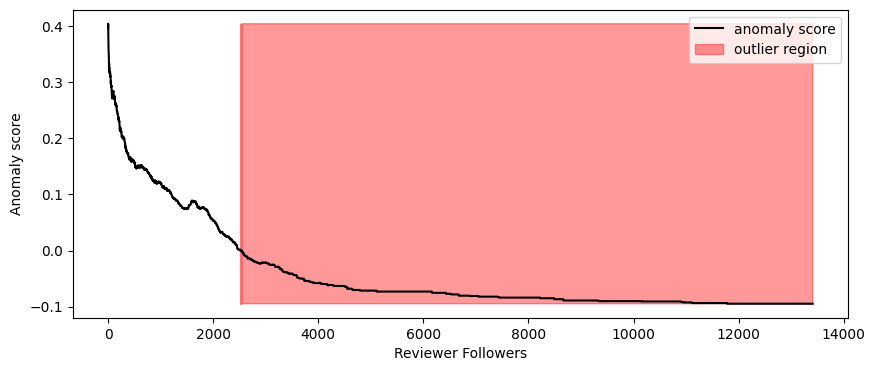

In [769]:
#chart to visualize outliers in reviewer followers feature
xx = np.linspace(_merged_df['Reviewer_Followers'].min(),_merged_df['Reviewer_Followers'].max(),len(_merged_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize = (10,4))
plt.plot(xx,anomaly_score,label= 'anomaly score',color = 'black')
plt.fill_between(xx.T[0],np.min(anomaly_score),np.max(anomaly_score),where = outlier == -1,color = 'red',alpha = .4,label = 'outlier region')
plt.legend()
plt.ylabel('Anomaly score')
plt.xlabel('Reviewer Followers')
plt.show()

### Teating Outlier

[Text(0.5, 1.0, 'Boxplot of hotel dataframe')]

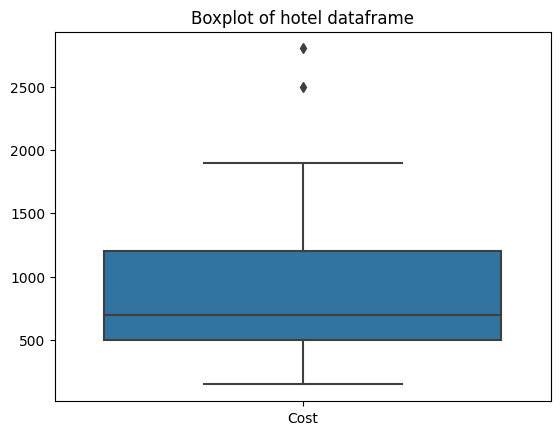

In [770]:
# Create a boxplot using Seaborn for the 'hotel' DataFrame and set a title for the plot.
sns.boxplot(hotel).set(title='Boxplot of hotel dataframe')
plt.show()

[Text(0.5, 1.0, 'Boxplot of review dataframe')]

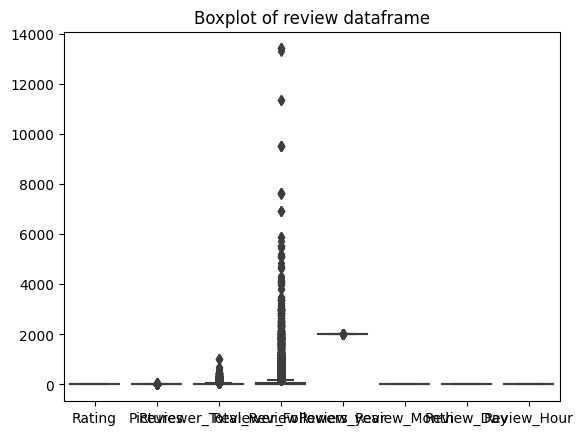

In [771]:
# Create a boxplot using Seaborn for the 'review' DataFrame and set a title for the plot.
plt.figure(figsize=(15,7))
sns.boxplot(review).set(title='Boxplot of review dataframe')
plt.show()

In [772]:
# Initialize lists to categorize features as symmetric or non-symmetric based on mean-median difference.
symmetric_feature = []
non_symmetric_feature = []
# Loop through columns in the '_merged_df' DataFrame and classify features as symmetric or non-symmetric.
for i in _merged_df.describe().columns:
  if i != 'Time':
    if abs(_merged_df[i].mean() - _merged_df[i].median()) < 0.2:
      symmetric_feature.append(i)
    else:
      non_symmetric_feature.append(i)
  else:
    continue
# Print the features classified as symmetric and non-symmetric.
print("Symmetric Distributed Features: -",symmetric_feature)

print("Skew symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features: - ['Review_Day', 'anomaly_score_univariate_cost', 'outlier_univariate_cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_year', 'Review_Month', 'Review_Hour']


In [773]:
# Define a function for outlier treatment based on the skew of a feature.
def outlier_treatment_skew_features(df,feature):
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  lower_wisker = df[feature].quantile(0.25) - 1.5*IQR
  upper_wisker = df[feature].quantile(0.75) + 1.5*IQR
  return upper_wisker,lower_wisker

In [774]:
#upper limit capping
hotel.loc[hotel['Cost'] > outlier_treatment_skew_features(df=hotel,feature='Cost')[0],'Cost'] = outlier_treatment_skew_features(df=hotel,feature='Cost')[0]
#lower limit capping
hotel.loc[hotel['Cost'] < outlier_treatment_skew_features(df=hotel,feature='Cost')[1],'Cost'] = outlier_treatment_skew_features(df=hotel,feature='Cost')[1]


In [775]:
#upper limit capping
review.loc[review['Reviewer_Followers'] > outlier_treatment_skew_features(df=review,feature='Reviewer_Followers')[0],'Reviewer_Followers'] = outlier_treatment_skew_features(df=review,feature='Reviewer_Followers')[0]
#lower limit capping
review.loc[review['Reviewer_Followers'] < outlier_treatment_skew_features(df=review,feature='Reviewer_Followers')[1],'Reviewer_Followers'] = outlier_treatment_skew_features(df=review,feature='Reviewer_Followers')[1]


In [776]:
#Droping the columns
_merged_df.drop(columns = ['anomaly_score_univariate_cost','outlier_univariate_cost','anomaly_score_univariate_follower','outlier_univariate_follower'],inplace = True)

In [777]:
# Display a random sample of 3 rows from the '_merged_df' DataFrame. This provides a quick view of the data.
_merged_df.sample(3)

Restaurant  \
1062  Sardarji's Chaats & More   
4018               Frio Bistro   
7245                   Labonel   

                                                  Links  Cost  \
1062  https://www.zomato.com/hyderabad/sardarjis-cha...   400   
4018  https://www.zomato.com/hyderabad/frio-bistro-g...  1200   
7245  https://www.zomato.com/hyderabad/labonel-gachi...  1000   

                                     Cuisines  \
1062     Street Food, North Indian, Fast Food   
4018  European, Italian, Continental, Spanish   
7245                         Bakery, Desserts   

                                   Timings        Reviewer  \
1062  12 Noon to 3:30 PM, 7 PM to 10:30 PM  Projwal Tiwari   
4018              12noon to 11pm (Mon-Sun)      Asmita Pal   
7245   11 AM to 8 PM (Mon-Sat), Sun Closed         Jcunaht   

                                                 Review  Rating  \
1062  Really good with the taste and the quality!! P...     4.0   
4018  Food and ambience was great. But the service w...     4.0   
7245  Fine baking it is! Place looks classy. It is e...     4.5   

                       Metadata                Time  Pictures  \
1062  7 Reviews , 215 Followers 2018-12-06 13:29:00         1   
4018    3 Reviews , 2 Followers 2019-04-14 12:30:00         0   
7245  32 Reviews , 48 Followers 2017-12-01 15:07:00         3   

      Reviewer_Total_Review  Reviewer_Followers  Review_year  Review_Month  \
1062                    7.0               215.0       2018.0          12.0   
4018                    3.0                 2.0       2019.0           4.0   
7245                   32.0                48.0       2017.0          12.0   

      Review_Day  Review_Hour  
1062         6.0         13.0  
4018        14.0         12.0  
7245         1.0         15.0

## 3. Categorical Encoding

In [778]:
# Display the first few rows of the 'hotel' DataFrame to examine the structure of the dataset.
hotel.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

In [779]:
# Split the 'Cuisines' column in the 'hotel' DataFrame by comma (',') to create a list of cuisines.
hotel['Cuisines'][0].split(',')

['Chinese',
 ' Continental',
 ' Kebab',
 ' European',
 ' South Indian',
 ' North Indian']

In [780]:
# Split the 'Cuisines' column in the 'hotel' DataFrame by comma (',') to create a list of cuisines.
hotel['Cuisines_list'] = hotel['Cuisines'].apply(lambda x: x.split(','))

In [781]:
# Create a DataFrame called 'cluster_dummy' containing the 'Restaurant' and 'Cuisines_list' columns from 'hotel'.
cluster_dummy = hotel[['Restaurant','Cuisines_list']]

# Explode the 'Cuisines_list' column to create separate rows for each cuisine.
cluster_dummy = cluster_dummy.explode('Cuisines_list')

# Remove leading and trailing white spaces from the values in the 'Cuisines_list' column.
cluster_dummy['Cuisines_list'] = cluster_dummy['Cuisines_list'].apply(lambda x: x.strip())

# One-hot encode the 'Cuisines_list' column, creating dummy variables for each cuisine.
cluster_dummy = pd.get_dummies(cluster_dummy,columns = ['Cuisines_list'],prefix = ['Cuisines'])

# Clean the column names by removing the "Cuisines_" prefix.
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")

# Group the data by 'Restaurant' and sum the one-hot encoded cuisine variables.
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [782]:
# creating the 'Average_Rating' column in the merged dataset with the average ratings
cluster_dummy['Average_Rating']=_merged_df['Restaurant'].map(restaurants_rating)
cluster_dummy.head()

In [784]:
# Calculate and assign the total count of cuisines for each restaurant to a new column, 'Total_Cuisine_Count'.
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x: len(x.split(',')))

In [785]:
# Merge the 'cluster_dummy' DataFrame with the 'hotel' DataFrame on the 'Restaurant' column.
cluster_dummy = hotel[['Restaurant','Cost','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')

In [786]:

# Display the shape (number of rows and columns) of the 'cluster_dummy' DataFrame.
cluster_dummy.shape

(105, 48)

In [787]:
# Transpose the first 3 rows of 'cluster_dummy' to examine the data in a different format.
cluster_dummy.head(3).T

0         1         2
Restaurant           Beyond Flavours  Paradise  Flechazo
Cost                             800       800      1300
Total_Cuisine_Count                6         3         4
American                           0         0         0
Andhra                             0         0         0
Arabian                            0         0         0
Asian                              0         0         1
BBQ                                0         0         0
Bakery                             0         0         0
Beverages                          0         0         0
Biryani                            0         1         0
Burger                             0         0         0
Cafe                               0         0         0
Chinese                            1         1         0
Continental                        1         0         0
Desserts                           0         0         1
European                           1         0         0
Fast Food                          0         0         0
Finger Food                        0         0         0
Goan                               0         0         0
Healthy Food                       0         0         0
Hyderabadi                         0         0         0
Ice Cream                          0         0         0
Indonesian                         0         0         0
Italian                            0         0         0
Japanese                           0         0         0
Juices                             0         0         0
Kebab                              1         0         0
Lebanese                           0         0         0
Malaysian                          0         0         0
Mediterranean                      0         0         1
Mexican                            0         0         0
Mithai                             0         0         0
Modern Indian                      0         0         0
Momos                              0         0         0
Mughlai                            0         0         0
North Eastern                      0         0         0
North Indian                       1         1         1
Pizza                              0         0         0
Salad                              0         0         0
Seafood                            0         0         0
South Indian                       1         0         0
Spanish                            0         0         0
Street Food                        0         0         0
Sushi                              0         0         0
Thai                               0         0         0
Wraps                              0         0         0
Average_Rating                   4.3       4.3       4.3

## 4. Textual Data Preprocessing - Review data

In [788]:
# Create a new DataFrame 'sentiment_df' containing specific columns from the 'review' DataFrame: 'Reviewer,' 'Restaurant,' 'Rating,' and 'Review.'
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
# Display a random sample of 2 rows from the 'sentiment_df' DataFrame.
sentiment_df.sample(2)

Reviewer                           Restaurant  Rating  \
7963  Baishali Ghosh                         Olive Garden     4.0   
3621       Keerthi M  Banana Leaf Multicuisine Restaurant     4.0   

                                                 Review  
7963  FOOD:\nThe food was quite delicious.\nI ordere...  
3621  *Here carrot halwa is superb*\n*Andhra chicken...

In [789]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [790]:
# Display another random sample of 2 rows from the 'sentiment_df' DataFrame.
sentiment_df.sample(2)

index          Reviewer        Restaurant  Rating  \
983     983  Shubhangi Gautam       Cream Stone     5.0   
1752   1752         Reet Kaur  Hotel Zara Hi-Fi     1.0   

                                                 Review  
983   I love treating myself to cream stone every on...  
1752  only one small piece of chicken was sent. wors...

In [791]:
# Install the 'contractions' library, which is used to handle contractions in text.
!pip install contractions

In [792]:
# Import the 'contractions' library.
import contractions
# Apply contractions fixing to the 'Review' column in the 'sentiment_df' DataFrame.
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: contractions.fix(x))

In [793]:
# Display the 'sentiment_df' DataFrame.
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  The ambience was good, food was quite good . h...  
1  Ambience is too good for a pleasant evening. S...  
2  A must try.. great food great ambience. Thnx f...  
3  Soumen das and Arun was a great guy. Only beca...  
4  Food is good.we ordered Kodi drumsticks and ba...

In [794]:
# Display the shape (number of rows and columns) of the 'sentiment_df' DataFrame.
sentiment_df.shape

(9961, 5)

In [795]:
# Import necessary libraries and download required data from the NLTK library for text preprocessing.
import nltk
from nltk.corpus import stopwords


nltk.download('all')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [796]:
# Import the WordNetLemmatizer from NLTK for text lemmatization.
from nltk.stem import WordNetLemmatizer
# Initialize a WordNetLemmatizer.
lemmatizer = WordNetLemmatizer()

In [797]:
# Import libraries for text preprocessing.
from nltk.tokenize.sonority_sequencing import punctuation
import re
import string

# Define a function 'transform_text' for text preprocessing.
def transform_text(text):

  text = text.lower()

  text = re.sub(r'http\S+','',text)

  test = re.sub(r'\d+','',text)

  words = nltk.word_tokenize(text)

  words = [word for word in words if word.isalnum()]

  stopwords_set = stopwords.words('english')
  punctuation_set = set(string.punctuation)
  words = [word for word in words if word not in stopwords_set and punctuation_set]

  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  return lemmatized_words


In [798]:
# Define a function 'transform_clean_text' for text preprocessing without returning a list of words.

def transform_clean_text(text):

  text = text.lower()

  text = re.sub(r'http\S+','',text)

  text = re.sub(r'\d+','',text)

  words = nltk.word_tokenize(text)

  words = [word for word in words if word.isalnum()]

  stopwords_set = stopwords.words('english')
  punctuation_set = set(string.punctuation)
  words = [word for word in words if word not in stopwords_set and punctuation_set]

  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  return ' '.join(lemmatized_words)

In [799]:
# Apply text preprocessing functions to create new columns in the 'sentiment_df' DataFrame.
sentiment_df['Review_list'] = sentiment_df['Review'].apply(transform_text)
sentiment_df['cleaned_Review'] = sentiment_df['Review'].apply(transform_clean_text)

In [800]:
# Import the 'TfidfVectorizer' from scikit-learn for TF-IDF vectorization.
from sklearn.feature_extraction.text import TfidfVectorizer
# Define a function 'cols_to_remove' to identify numeric columns in a DataFrame.
def cols_to_remove(df):
  cols = []
  for col in df.columns:
    try:
      int(col)
      cols.append(col)
    except:
      continue

  return cols

# Define a function 'cleaned_tweets_processing' for TF-IDF vectorization and preprocessing.
def cleaned_tweets_processing():
# Create a TF-IDF vectorizer with specific settings.
  tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words = 'english', max_df=0.7,min_df=70)
# Fit and transform the TF-IDF vectorizer on the 'cleaned_Review' values in the 'sentiment_df' DataFrame.
  tfidf_wm = tfidfvectorizer.fit_transform(sentiment_df['cleaned_Review'].values)
  # Get the feature names (tokens) from the TF-IDF vectorizer.
  tfidf_tokens = tfidfvectorizer.get_feature_names_out()
  # Create a new DataFrame 'df_tfidfvect' from the TF-IDF word matrix.
  df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
# Identify and remove numeric columns in the 'df_tfidfvect' DataFrame.
  trash_cols = cols_to_remove(df_tfidfvect)

  #Removing all the numeric columns
  df_tfidfvect.drop(columns=trash_cols,inplace=True)

  return df_tfidfvect

In [801]:
# Apply the 'cleaned_tweets_processing' function to generate the 'x_tfidf' DataFrame.
x_tfidf = cleaned_tweets_processing()

In [802]:
# Display 'x_tfidf' DataFrame.
x_tfidf.head()

absolutely  actually  add  added  aloo   amazing  ambiance  ambience  \
0         0.0       0.0  0.0    0.0   0.0  0.000000       0.0  0.165753   
1         0.0       0.0  0.0    0.0   0.0  0.000000       0.0  0.213566   
2         0.0       0.0  0.0    0.0   0.0  0.332315       0.0  0.255217   
3         0.0       0.0  0.0    0.0   0.0  0.000000       0.0  0.000000   
4         0.0       0.0  0.0    0.0   0.0  0.000000       0.0  0.243348   

   apart  area  ...  wonderful  work  worst  worth  wrong  year  yes  \
0    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
1    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
2    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
3    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
4    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   

   yesterday  yummy  zomato  
0        0.0    0.0     0.0  
1        0.0    0.0     0.0  
2        0.0    0.0     0.0  
3        0.0    0.0     0.0  
4        0.0    0.0     0.0  

[5 rows x 524 columns]

In [803]:
# Display the shape (number of rows and columns) of the 'x_tfidf' DataFrame.
x_tfidf.shape

(9961, 524)

In [804]:
# Display the shape of the 'cluster_dummy' DataFrame to show the number of rows and columns.
cluster_dummy.shape

(105, 48)

### Feature Manipulation and Selection

#### Feature Manipulation

Returant

---

In [805]:
# Display the shape (number of rows and columns) of the 'hotel' DataFrame.
hotel.shape

(105, 7)

In [806]:
# Display the first few rows of the 'hotel' DataFrame to inspect the data.
hotel.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  \
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)   
1                                     11 AM to 11 PM   
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM   
3                                    12 Noon to 2 AM   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...   

                                       Cuisines_list  Total_Cuisine_Count  
0  [Chinese,  Continental,  Kebab,  European,  So...                    6  
1                 [Biryani,  North Indian,  Chinese]                    3  
2  [Asian,  Mediterranean,  North Indian,  Desserts]                    4  
3  [Biryani,  North Indian,  Chinese,  Seafood,  ...                    5  
4  [Asian,  Continental,  North Indian,  Chinese,...                    5

In [807]:
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Cuisines_list',
       'Total_Cuisine_Count'],
      dtype='object')

In [808]:
# Display the column names (features) of the 'hotel' DataFrame.
hotel_columns = hotel.columns
# Remove the 'Links' and 'Cuisines_list' columns from the 'hotel' DataFrame.
hotel = hotel.drop(columns = ['Links','Cuisines_list'])

In [809]:
# Display the new shape of the 'hotel' DataFrame after removing columns.
hotel.shape

(105, 5)

In [810]:
# Display the calculated mean rating.
mean_rating = sentiment_df['Rating'].mean()
#Create a new column 'Sentiment' in the 'sentiment_df' DataFrame, assigning a binary value based on whether the 'Rating' is above or below the mean rating.
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x > mean_rating else 0)

In [811]:
# Display the calculated mean rating.
mean_rating

3.601044071880333

In [812]:
# Display a random sample of 2 rows from the 'sentiment_df' DataFrame.
sentiment_df.sample(2)

index         Reviewer                     Restaurant  Rating  \
7685   7685  Epicurean Tales  The Old Madras Baking Company     4.0   
989     989        Yugandhar                    Cream Stone     5.0   

                                                 Review  \
7685  This place is located near the HDFC Bank insid...   
989                                                good   

                                            Review_list  \
7685  [place, located, near, hdfc, bank, inside, mee...   
989                                              [good]   

                                         cleaned_Review  Sentiment  
7685  place located near hdfc bank inside meenakshi ...          1  
989                                                good          1

In [813]:
# Count and display the number of positive (1) and negative (0) sentiments in the 'Sentiment' column of the 'sentiment_df' DataFrame.
sentiment_df['Sentiment'].value_counts()

1    6274
0    3687
Name: Sentiment, dtype: int64

In [814]:
# Display the first few rows of the 'cluster_dummy' DataFrame.
cluster_dummy.head()

Restaurant  Cost  Total_Cuisine_Count  American  \
0                 Beyond Flavours   800                    6         0   
1                        Paradise   800                    3         0   
2                        Flechazo  1300                    4         0   
3  Shah Ghouse Hotel & Restaurant   800                    5         0   
4      Over The Moon Brew Company  1200                    5         0   

   Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  Pizza  Salad  Seafood  \
0       0        0      0    0       0          0  ...      0      0        0   
1       0        0      0    0       0          0  ...      0      0        0   
2       0        0      1    0       0          0  ...      0      0        0   
3       0        0      0    0       0          1  ...      0      0        1   
4       0        0      1    0       0          0  ...      0      0        0   

   South Indian  Spanish  Street Food  Sushi  Thai  Wraps  Average_Rating  
0             1        0            0      0     0      0             4.3  
1             0        0            0      0     0      0             4.3  
2             0        0            0      0     0      0             4.3  
3             0        0            0      0     0      0             4.3  
4             0        0            0      0     0      0             4.3  

[5 rows x 48 columns]

### Data Transformation

<Axes: xlabel='Cost', ylabel='Density'>

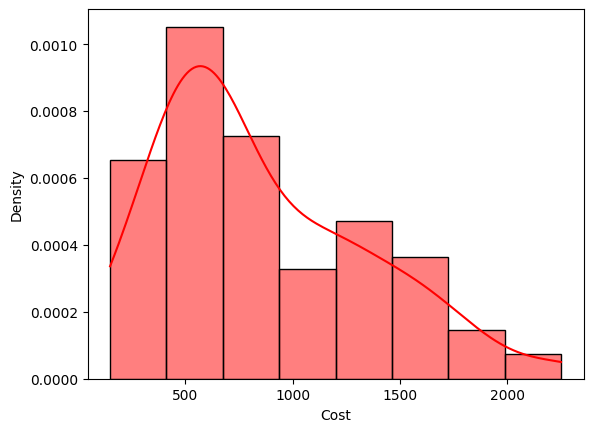

In [815]:
# The plotshows the density distribution of 'Cost' values.
sns.histplot(cluster_dummy['Cost'],stat = 'density',kde = True).set(title='histplot of cluster_dummy')
plt.show()

In [816]:
# Display a random sample of 2 rows from the 'cluster_dummy' DataFrame.
cluster_dummy.sample(2)

Restaurant  Cost  Total_Cuisine_Count  American  \
97  Zega - Sheraton Hyderabad Hotel  1750                    2         0   
47                  Shanghai Chef 2   800                    4         0   

    Andhra  Arabian  Asian  BBQ  Bakery  Beverages  ...  Pizza  Salad  \
97       0        0      1    0       0          0  ...      0      0   
47       0        0      1    0       0          0  ...      0      0   

    Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  \
97        0             0        0            0      1     0      0   
47        0             0        0            0      0     1      0   

    Average_Rating  
97             4.7  
47             4.3  

[2 rows x 48 columns]

In [817]:
# Create a DataFrame 'symmetry_check' containing specific columns from the 'cluster_dummy' DataFrame: 'Cost,' 'Average_Rating,' and 'Total_Cuisine_Count.'
symmetry_check = cluster_dummy[['Cost','Average_Rating','Total_Cuisine_Count']]

In [818]:
# Initialize lists to categorize features as symmetric or non-symmetric based on mean-median difference.
symmetric_features = []
symmetric_features = []

# Loop through columns in the 'symmetry_check' DataFrame and classify features as symmetric or non-symmetric.
non_symmetric_features = []
for i in symmetry_check.describe().columns:
  if abs(symmetry_check[i].mean() - symmetry_check[i].median() < 0.1):
    symmetric_features.append(i)
  else:
    non_symmetric_features.append(i)
# Print the features classified as symmetric and non-symmetric in the distribution.
print("Symmetric Distribution Features: -",symmetric_features)

print("Skew symmetric Distributed Features : -",non_symmetric_features)

Symmetric Distribution Features: - ['Average_Rating', 'Total_Cuisine_Count']
Skew symmetric Distributed Features : - ['Cost']


In [819]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

Text(0.5, 1.0, 'Cost')

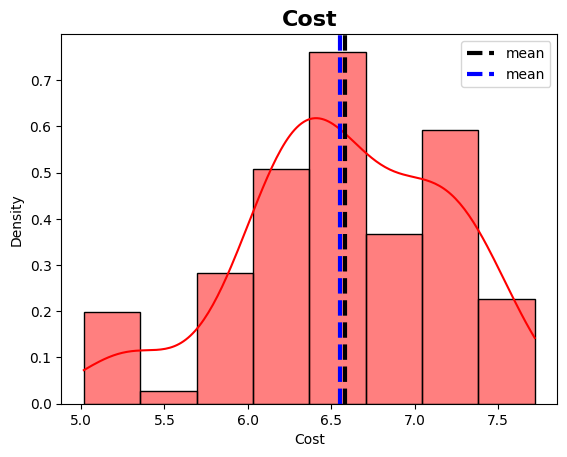

In [820]:
# Create a new histogram with a kernel density estimate for the transformed 'Cost' values.
# The plot is in red, and vertical lines indicate the mean and median values.
sns.histplot(cluster_dummy['Cost'],stat = 'density',kde = True,color = 'yellow')
plt.axvline(cluster_dummy['Cost'].mean(),color = 'black',linestyle = 'dashed',linewidth = 3,label = 'mean')
plt.axvline(cluster_dummy['Cost'].median(),color = 'blue',linestyle = 'dashed',linewidth = 3,label = 'mean')
plt.legend(bbox_to_anchor = (1.0,1),loc = 'best')
plt.title('visualization of histplot of Cost',fontsize = 16,fontweight = 'bold')
plt.show()

### Data Scaling

In [821]:
# Create a copy of the 'cluster_dummy' DataFrame and assign it to 'cluster_df.'
cluster_df = cluster_dummy.copy()

In [822]:

# Display a random sample of 5 rows from the 'cluster_df' DataFrame.
cluster_df.sample(5)

Restaurant      Cost  Total_Cuisine_Count  American  Andhra  Arabian  \
60       PourHouse7  7.090910                    4         0       0        0   
9       Cream Stone  5.860786                    2         0       0        0   
40      Frio Bistro  7.090910                    4         0       0        0   
53  Diners Pavilion  7.090910                    3         0       0        0   
20         13 Dhaba  6.111467                    1         0       0        0   

    Asian  BBQ  Bakery  Beverages  ...  Pizza  Salad  Seafood  South Indian  \
60      0    0       0          0  ...      0      0        0             0   
9       0    0       0          0  ...      0      0        0             0   
40      0    0       0          0  ...      0      0        0             0   
53      0    0       0          0  ...      0      0        0             0   
20      0    0       0          0  ...      0      0        0             0   

    Spanish  Street Food  Sushi  Thai  Wraps  Average_Rating  
60        0            0      0     0      0             4.3  
9         0            0      0     0      0             4.3  
40        1            0      0     0      0             4.3  
53        0            0      0     0      0             4.3  
20        0            0      0     0      0             4.3  

[5 rows x 48 columns]

In [823]:
#Normalizing the numerical columns
from sklearn.preprocessing import StandardScaler
# Define a list of numerical columns that need to be standardized.
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
# Create a 'StandardScaler' object named 'scaler' and fit it to the numerical columns in the 'cluster_df' DataFrame.
scaler = StandardScaler()
scaler.fit(cluster_df[numerical_cols])

# Create a copy of the 'cluster_df' DataFrame named 'scaled_df.'
# Standardize the values in the specified numerical columns using the fitted 'scaler.'
scaled_df = cluster_df.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_df[numerical_cols])

### Dimensionality Reduction

In [824]:
# Set the 'Restaurant' column as the index of the 'scaled_df' DataFrame, which is a common step in dimensionality reduction.
scaled_df.set_index(['Restaurant'],inplace = True)

In [825]:
# Import the 'PCA' (Principal Component Analysis) class from scikit-learn to perform dimensionality reduction.
from sklearn.decomposition import PCA
# Define the list of features to be used for PCA, which includes all columns in the 'scaled_df' DataFrame.
features =  scaled_df.columns
# Create a PCA object named 'pca' and fit it to the 'scaled_df' using the specified features.
pca = PCA()
pca.fit(scaled_df[features])



PCA()

Text(0, 0.5, 'cumulative explained variance')

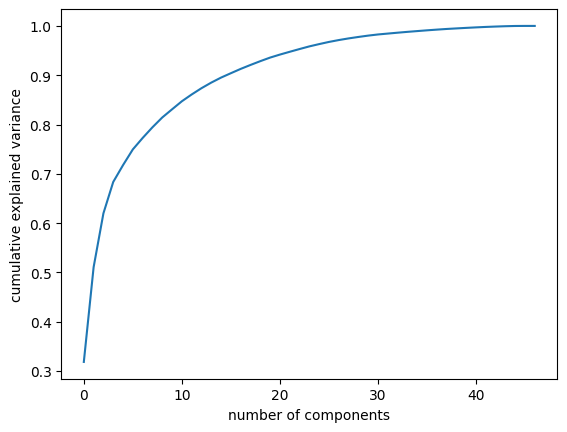

In [826]:
# Create a plot to visualize the cumulative explained variance ratio as a function of the number of principal components.
# This helps in determining the optimal number of components to retain.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [827]:

# Specify the desired number of principal components ('n_components') for PCA. In this case, 'n_components' is set to 6.
pca = PCA(n_components = 6)
pca.fit(scaled_df[features])

# Print the explained variation per principal component and the cumulative variance explained by 6 principal components.
print('Explained Variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('\n')
print('Cumulative variance explained by 10 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))
# Transform the 'scaled_df' data using PCA, reducing the dimensionality to 6 principal components.
df_pca = pca.transform(scaled_df[features])

Explained Variation per principal component: [0.31852437 0.19221771 0.10921623 0.0635873  0.03414383 0.03187276]


Cumulative variance explained by 10 principal components: 74.96%


In [828]:
# Display the original shape (dimensions) of 'scaled_df' and the transformed shape after PCA.
print("Original shape: ",scaled_df.shape)
print("Transformed shape: ",df_pca.shape)

Original shape:  (105, 47)
Transformed shape:  (105, 6)


## Data Splitting

In [829]:
# Assign the feature matrix 'X' to the 'x_tfidf' DataFrame and the target variable 'y' to the 'Sentiment' column in the 'sentiment_df' DataFrame.
X = x_tfidf
y = sentiment_df['Sentiment']

In [830]:
# Display the shape of the 'sentiment_df' DataFrame, showing the number of rows and columns.
sentiment_df.shape

(9961, 8)

In [831]:
# Import the 'train_test_split' function from scikit-learn to split the data into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

# Print the shapes of the training and testing datasets to confirm the split.
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)

X_train:  (7968, 524)
X_test:  (1993, 524)


### Handling imbalance Dataset

In [832]:
# Create a DataFrame 'vc' containing the counts of positive and negative sentiments in the 'Sentiment' column of the 'sentiment_df' DataFrame.
vc = sentiment_df['Sentiment'].value_counts().reset_index()

# Generate a pie chart using Plotly Express to visualize the proportions of positive and negative sentiments in the dataset.
# The chart is titled "Positive and Negative Sentiments Proportion" and uses a color sequence for better visualization.
fig = px.pie(vc,values = "Sentiment",names = ["Positive Sentiment","Negative Sentiment"],title = 'Positive and Negative Sentiments Proportion', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [833]:
# Display the 'sentiment_df' DataFrame, which contains sentiment labels and reviews.
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9956   9956      Abhishek Mahajan  Chinese Pavilion     3.0   
9957   9957        Sharad Agrawal  Chinese Pavilion     4.5   
9958   9958             Ramandeep  Chinese Pavilion     1.5   
9959   9959       Nayana Shanbhag  Chinese Pavilion     4.0   
9960   9960      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  \
0     The ambience was good, food was quite good . h...   
1     Ambience is too good for a pleasant evening. S...   
2     A must try.. great food great ambience. Thnx f...   
3     Soumen das and Arun was a great guy. Only beca...   
4     Food is good.we ordered Kodi drumsticks and ba...   
...                                                 ...   
9956  Madhumathi Mahajan Well to start with nice cou...   
9957  This place has never disappointed us.. The foo...   
9958  Bad rating is mainly because of "Chicken Bone ...   
9959  I personally love and prefer Chinese Food. Had...   
9960  Checked in here to try some delicious chinese ...   

                                            Review_list  \
0     [ambience, good, food, quite, good, saturday, ...   
1     [ambience, good, pleasant, evening, service, p...   
2     [must, try, great, food, great, ambience, thnx...   
3     [soumen, da, arun, great, guy, behavior, since...   
4     [food, ordered, kodi, drumstick, basket, mutto...   
...                                                 ...   
9956  [madhumathi, mahajan, well, start, nice, court...   
9957  [place, never, disappointed, u, food, courteou...   
9958  [bad, rating, mainly, chicken, bone, found, ve...   
9959  [personally, love, prefer, chinese, food, coup...   
9960  [checked, try, delicious, chinese, food, seen,...   

                                         cleaned_Review  Sentiment  
0     ambience good food quite good saturday lunch c...          1  
1     ambience good pleasant evening service prompt ...          1  
2     must try great food great ambience thnx servic...          1  
3     soumen da arun great guy behavior sincerety go...          1  
4     food ordered kodi drumstick basket mutton biry...          1  
...                                                 ...        ...  
9956  madhumathi mahajan well start nice courteous s...          0  
9957  place never disappointed u food courteous staf...          1  
9958  bad rating mainly chicken bone found veg food ...          0  
9959  personally love prefer chinese food couple tim...          1  
9960  checked try delicious chinese food seen lunche...          0  

[9961 rows x 8 columns]

In [834]:
# Display the 'vc' DataFrame, showing the counts of positive and negative sentiments.
vc

index  Sentiment
0      1       6274
1      0       3687

In [835]:
#Calculating CIR

majority_calss = vc['Sentiment'][0]
minority_class = vc['Sentiment'][1]
# Calculate the Class Imbalance Ratio (CIR) by dividing the count of the majority class by the minority class
CIR = majority_calss / minority_class
print("CIR: ",CIR)

CIR:  1.701654461621915


#7.ML Model Implementation

### KMeans Clustering

In [836]:
# Importing necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [837]:
# Calculate Within-Cluster-Sum-of-Squares (WCSS) for different K values
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i,init ="k-means++",random_state = 20 )
  km.fit(df_pca)
  wcss.append(km.inertia_)


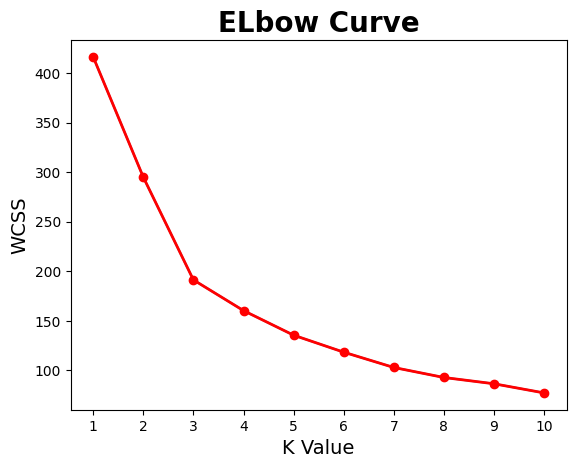

In [838]:
# Plotting the Elbow Curve to determine the optimal number of clusters
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth = 2,color = "red",marker = "o")
plt.xlabel("K Value",fontsize= 14)
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS",fontsize = 14)
plt.title("ELbow Curve",fontsize = 20,fontweight = 'bold')
plt.show()

In [839]:

# Calculate Silhouette Score for different K values
silhouette_coefficients = []

for k in range(2,12):
  kmeans = KMeans(n_clusters = k,init = "k-means++",max_iter = 10000)
  kmeans.fit(df_pca)
  score = silhouette_score(df_pca,kmeans.labels_)
  silhouette_coefficients.append(score)
  print(f'n_clusters = {k}, silhouette Score : {score}')

n_clusters = 2, silhouette Score : 0.2791909300069178
n_clusters = 3, silhouette Score : 0.32911983743175166
n_clusters = 4, silhouette Score : 0.2693531411418334
n_clusters = 5, silhouette Score : 0.2671627714937424
n_clusters = 6, silhouette Score : 0.2810976078225734
n_clusters = 7, silhouette Score : 0.2869030708095484
n_clusters = 8, silhouette Score : 0.2957682021492853
n_clusters = 9, silhouette Score : 0.3119062526212568
n_clusters = 10, silhouette Score : 0.30404419118055587
n_clusters = 11, silhouette Score : 0.3002381507896634


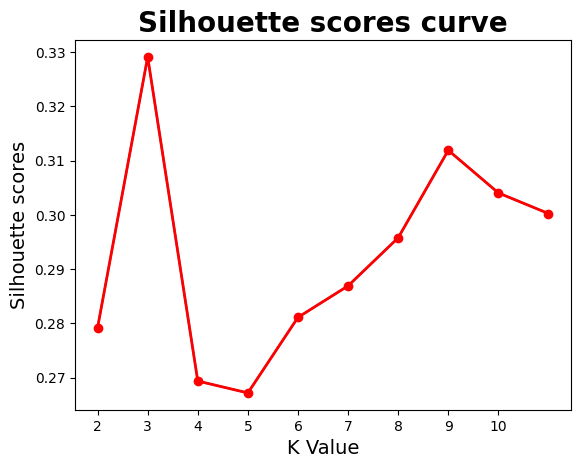

In [840]:
# Plot the Silhouette scores curve to determine the optimal number of clusters
plt.plot(range(2,12),silhouette_coefficients)
plt.plot(range(2,12),silhouette_coefficients,linewidth = 2,color = "red",marker = "o")
plt.xlabel("K Value",fontsize= 14)
plt.xticks(np.arange(2,11,1))
plt.ylabel("Silhouette scores",fontsize = 14)
plt.title("Silhouette scores curve",fontsize = 20,fontweight = 'bold')
plt.show()

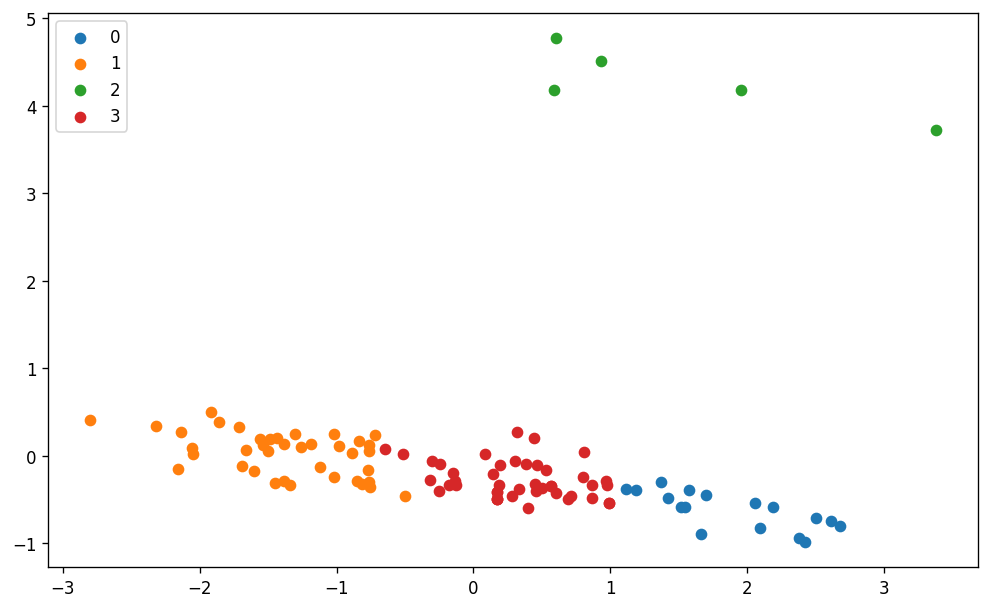

In [841]:
# Perform K-Means clustering with the chosen number of clusters (4 in this case)
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state=42)
kmeans.fit(df_pca)
# Get cluster labels for the data points
label = kmeans.fit_predict(df_pca)
# Plot the clustered data
unique_labels = np.unique(label)

plt.figure(figsize = (10,6), dpi = 120)
for i in unique_labels:
  plt.scatter(df_pca[label == i,0],df_pca[label == i,1],label = i)

plt.legend()
plt.show()

In [842]:
# Create a DataFrame for PCA data and add cluster labels
kmeans_pca_df = pd.DataFrame(df_pca,columns = ['PC1','PC2','PC3','PC4','PC5','PC6'],index = scaled_df.index)
kmeans_pca_df['label'] = label
kmeans_pca_df.sample(5)

PC1       PC2       PC3       PC4       PC5  \
Restaurant                                                                 
American Wild Wings    -0.125030 -0.336287 -0.563852  1.200710 -0.010414   
Mustang Terrace Lounge -2.046083  0.018658 -0.494433  0.039721 -0.137221   
Mohammedia Shawarma     2.374723 -0.941680 -0.884417  0.244439 -0.288061   
Karachi Cafe            0.503428 -0.364321 -0.052359  1.190861  0.095679   
Deli 9 Bistro           0.142964 -0.207042  0.298656  0.968868 -0.151817   

                             PC6  label  
Restaurant                               
American Wild Wings    -0.455047      3  
Mustang Terrace Lounge  0.003657      1  
Mohammedia Shawarma     0.636052      0  
Karachi Cafe           -0.560734      3  
Deli 9 Bistro           0.235945      3

In [843]:
#joining the cluster labels to cluster_df DataFrame
cluster_df.set_index(['Restaurant'],inplace=True)
cluster_df = cluster_df.join(kmeans_pca_df['label'])
cluster_df.sample(3)

Cost  Total_Cuisine_Count  American  Andhra  \
Restaurant                                                                    
Urban Asia - Kitchen & Bar  7.003974                    5         0       0   
Mustang Terrace Lounge      7.170888                    5         0       0   
Desi Bytes                  5.993961                    2         0       0   

                            Arabian  Asian  BBQ  Bakery  Beverages  Biryani  \
Restaurant                                                                    
Urban Asia - Kitchen & Bar        0      1    0       0          0        0   
Mustang Terrace Lounge            0      0    0       0          0        0   
Desi Bytes                        0      0    0       0          0        0   

                            ...  Salad  Seafood  South Indian  Spanish  \
Restaurant                  ...                                          
Urban Asia - Kitchen & Bar  ...      0        0             0        0   
Mustang Terrace Lounge      ...      1        0             0        0   
Desi Bytes                  ...      0        0             0        0   

                            Street Food  Sushi  Thai  Wraps  Average_Rating  \
Restaurant                                                                    
Urban Asia - Kitchen & Bar            0      1     1      0             4.3   
Mustang Terrace Lounge                0      0     0      0             4.3   
Desi Bytes                            0      0     0      0             4.3   

                            label  
Restaurant                         
Urban Asia - Kitchen & Bar      1  
Mustang Terrace Lounge          1  
Desi Bytes                      3  

[3 rows x 48 columns]

In [844]:
# Convert the 'Cost' column back to its original scale
cluster_df['Cost'] = np.expm1(cluster_df['Cost'])
cluster_df.sample(2)

Cost  Total_Cuisine_Count  American  Andhra  Arabian  \
Restaurant                                                                     
Prism Club & Kitchen  1200.0                    4         0       0        0   
Khaan Saab            1100.0                    2         0       0        0   

                      Asian  BBQ  Bakery  Beverages  Biryani  ...  Salad  \
Restaurant                                                    ...          
Prism Club & Kitchen      0    0       0          0        0  ...      0   
Khaan Saab                0    0       0          0        0  ...      0   

                      Seafood  South Indian  Spanish  Street Food  Sushi  \
Restaurant                                                                 
Prism Club & Kitchen        0             0        0            0      0   
Khaan Saab                  0             0        0            0      0   

                      Thai  Wraps  Average_Rating  label  
Restaurant                                                
Prism Club & Kitchen     0      0             4.3      1  
Khaan Saab               0      0             4.3      3  

[2 rows x 48 columns]

In [845]:
# Merge clustering results with the original data
clustering_result = cluster_df.reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count','label']],on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines    Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...   800.0             4.3   
1                     Biryani, North Indian, Chinese   800.0             4.3   
2       Asian, Mediterranean, North Indian, Desserts  1300.0             4.3   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800.0             4.3   
4  Asian, Continental, North Indian, Chinese, Med...  1200.0             4.3   

   Total_Cuisine_Count  label  
0                    6      1  
1                    3      3  
2                    4      1  
3                    5      1  
4                    5      1

In [846]:
# Count the number of restaurants in each cluster
cluster_count = cluster_df['label'].value_counts().reset_index().rename(columns = {'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

label  Total_Restaurant
3      2                 5
2      0                17
1      1                39
0      3                44

In [847]:
#creating new df for checking cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')

new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines    Cost  \
32                   Marsala Food Company  North Indian   700.0   
53                        Diners Pavilion       Chinese  1200.0   
84                                T Grill        Andhra   700.0   
62  Shree Santosh Dhaba Family Restaurant       Chinese   500.0   
92   Collage - Hyatt Hyderabad Gachibowli   Continental  2250.0   

    Average_Rating  Total_Cuisine_Count  label  
32             4.3                    3      3  
53             4.3                    3      1  
84             4.3                    4      1  
62             4.3                    3      3  
92             4.3                    5      1

In [848]:
#printing cuisine list for each cluster

for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster : ',cluster,'\n')
  print(new_cluster_df[new_cluster_df['label'] == cluster]['Cuisines'].unique(),'\n')
  print(':'*120)

Cuisine List for Cluster :  1 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Desserts' 'Biryani' 'Seafood' 'Beverages' 'Goan'
 'American' 'BBQ' 'Italian' 'Finger Food' 'Japanese' 'Salad' 'Sushi'
 'Mexican' 'Bakery' 'Mughlai' 'Juices' 'Andhra' 'Spanish' 'Thai'
 'Indonesian' 'Modern Indian' 'Momos' 'Hyderabadi' 'Cafe' 'Burger'
 'Fast Food' 'Malaysian'] 

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Cuisine List for Cluster :  3 

['Biryani' 'North Indian' 'Chinese' 'Street Food' 'Fast Food'
 'Continental' 'American' 'Mediterranean' 'European' 'Mughlai' 'Andhra'
 'South Indian' 'Arabian' 'Hyderabadi' 'Cafe' 'Desserts' 'Bakery' 'Wraps'
 'Asian' 'Momos' 'Beverages' 'Burger' 'Kebab' 'Salad' 'Seafood'] 

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Cuisine List for Cluster :  2 

['Healthy

### Hirarchical Clustering

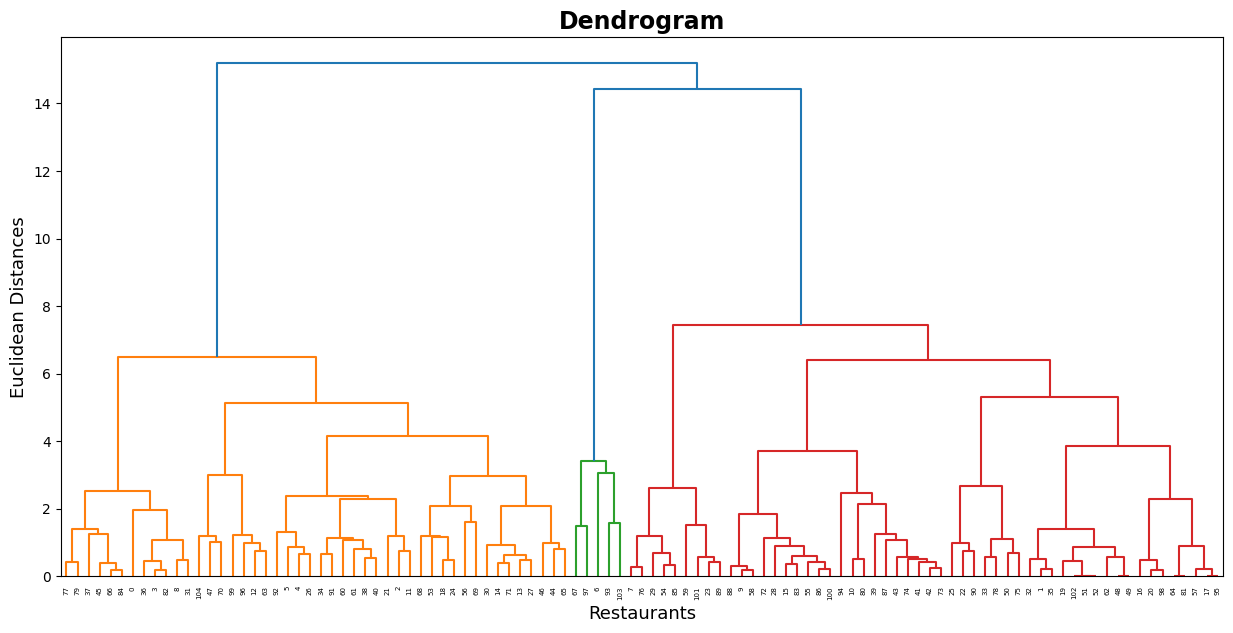

In [849]:
# Create a dendrogram to visualize hierarchical clustering
import  scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,7))
dendrogram = sch.dendrogram(sch.linkage(df_pca,method = 'ward'))

plt.title('Dendrogram',fontsize = 17,fontweight = 'bold')
plt.xlabel('Restaurants',fontsize = 13)
plt.ylabel('Euclidean Distances',fontsize = 13)
plt.show()

In [850]:
# Determine the optimal number of clusters using hierarchical clustering and silhouette scores
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = list(range(2,12))
for n_clusters in range_n_clusters:
  hc = AgglomerativeClustering(n_clusters = n_clusters,affinity = 'euclidean',linkage = 'ward')
  y_hc = hc.fit_predict(df_pca)
  score = silhouette_score(df_pca,y_hc)
  print("For n_clustes = {},silhouette score is {}".format(n_clusters,score))

For n_clustes = 2,silhouette score is 0.26396550416422215
For n_clustes = 3,silhouette score is 0.3167908733118731
For n_clustes = 4,silhouette score is 0.26405926196848295
For n_clustes = 5,silhouette score is 0.22414332569933687
For n_clustes = 6,silhouette score is 0.254038652899458
For n_clustes = 7,silhouette score is 0.262856250001003
For n_clustes = 8,silhouette score is 0.28851794766450684
For n_clustes = 9,silhouette score is 0.2865557897220748
For n_clustes = 10,silhouette score is 0.26985758717435704
For n_clustes = 11,silhouette score is 0.27582159073258317


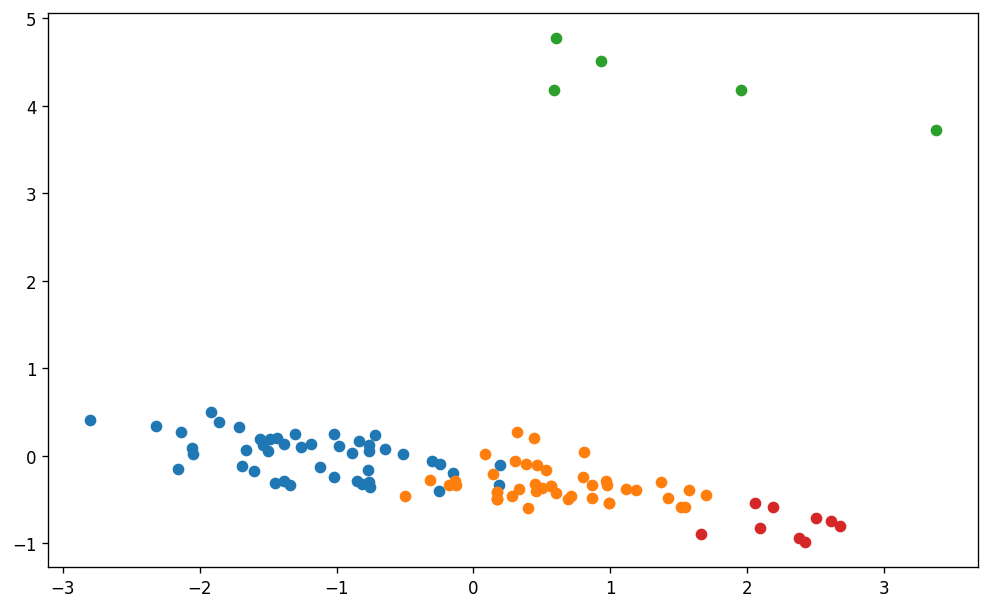

silhouette Coefficient: 0.264
davies_bouldin_score 1.067


In [851]:
#agglomerative Clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
# Perform hierarchical clustering with a specific number of clusters (4 in this case)
model = AgglomerativeClustering(n_clusters = 4)
y_hc = model.fit_predict(df_pca)
clusters = unique(y_hc)
plt.figure(figsize = (10,6), dpi = 120)

# Plot the clustered data points
for cluster in clusters:

  row_ix = where(y_hc == cluster)

  plt.scatter(df_pca[row_ix,0],df_pca[row_ix,1])

plt.show()
# Calculate and print the silhouette coefficient for the hierarchical clustering
print("silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc,metric = 'euclidean'))


from sklearn.metrics import davies_bouldin_score
# Calculate and print the Davies-Bouldin score for the hierarchical clustering
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca,y_hc))


In [852]:
# Add hierarchical clustering labels to the existing clustering results
clustering_result['label_hr'] = y_hc

In [853]:
# Display a sample of the clustered results
clustering_result.sample(5)

Restaurant                                 Cuisines  \
76  The Old Madras Baking Company                                   Bakery   
66                   Aromas@11SIX  North Indian, Chinese, Mughlai, Biryani   
52              Biryanis And More           North Indian, Biryani, Chinese   
29             Hunger Maggi Point                                Fast Food   
9                     Cream Stone                      Ice Cream, Desserts   

     Cost  Average_Rating  Total_Cuisine_Count  label  label_hr  
76  350.0             4.3                    1      0         3  
66  750.0             4.3                    4      1         0  
52  500.0             4.3                    3      3         1  
29  200.0             4.3                    1      0         3  
9   350.0             4.3                    2      0         1

#Sentiment Analysis

In [854]:
# Define a function to calculate and display model scores
from tabulate import tabulate
from sklearn.metrics import (                       # Various metrics for model evaluation
    accuracy_score, classification_report, precision_score, recall_score,
    roc_auc_score, f1_score, confusion_matrix, make_scorer
)
# Define a function to calculate and display model scores
def calculate_score(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  cm = confusion_matrix(y_test,y_pred)

  labels = ['Positive','Negative']
  cm = confusion_matrix(y_test,y_pred)
  # print(cm)

  ax = plt.subplot()
  sns.heatmap(cm,annot=True, cmap = 'Reds', fmt=".0f",ax=ax)

  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('Actual labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  plt.show()

    # Calculate and display various model evaluation metrics
  roc_auc = roc_auc_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  accuracy = accuracy_score(y_test,y_pred)

  table = [["ROC AUC",roc_auc],["Precision",precision],["Recall",recall],["F1",f1],["Accuracy",accuracy]]
  print(tabulate(table,headers = ["Metric","Score"]))

In [855]:

# Initialize a Logistic Regression model
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()

#################### LOGISTIC REGRESSION###################### 



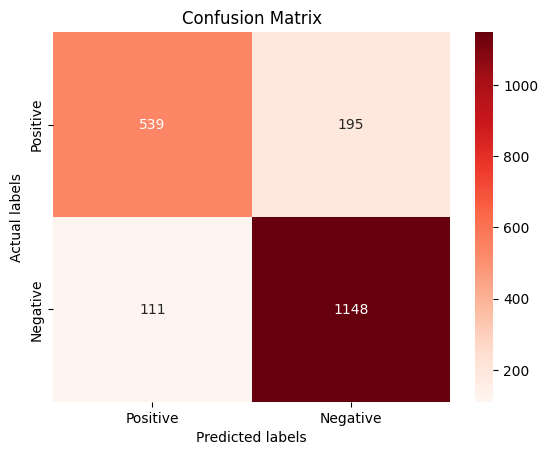

Metric        Score
---------  --------
ROC AUC    0.823084
Precision  0.854803
Recall     0.911835
F1         0.882398
Accuracy   0.846463


In [856]:
print("#################### LOGISTIC REGRESSION######################",'\n')
calculate_score(clf1,X_train,y_train,X_test,y_test)

### **`XGBoost Classifier`**

In [857]:
import xgboost
from xgboost import XGBClassifier

# Initialize an XGBoost Classifier model
clf2 = XGBClassifier()

#################### XGBOOST CLASSFIER ###################### 



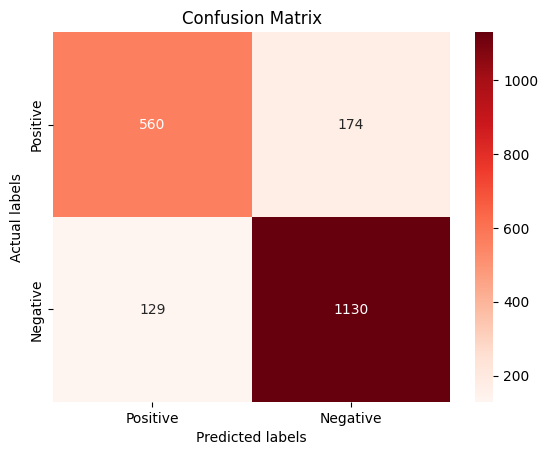

Metric        Score
---------  --------
ROC AUC    0.83024
Precision  0.866564
Recall     0.897538
F1         0.881779
Accuracy   0.847968


In [858]:
print("#################### XGBOOST CLASSFIER ######################",'\n')
calculate_score(clf2,X_train,y_train,X_test,y_test)

### `SVM`

In [859]:
from lightgbm import LGBMClassifier  # LightGBM classifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Initialize a LightGBM Classifier model
clf3 = LGBMClassifier(random_state = 42)


#################### SVM CLASSFIER ###################### 

[LightGBM] [Info] Number of positive: 5015, number of negative: 2953
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.177796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32235
[LightGBM] [Info] Number of data points in the train set: 7968, number of used features: 524
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.629393 -> initscore=0.529612
[LightGBM] [Info] Start training from score 0.529612


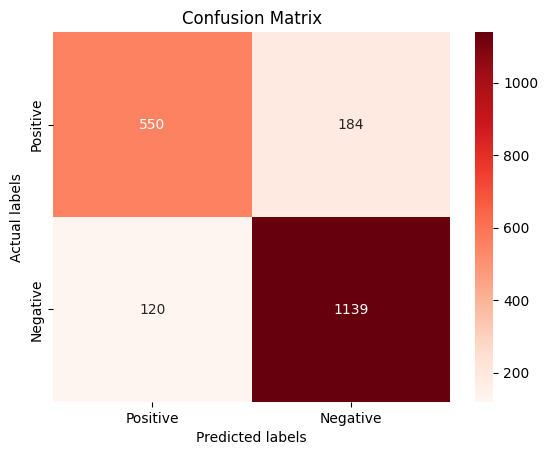

Metric        Score
---------  --------
ROC AUC    0.827003
Precision  0.860922
Recall     0.904686
F1         0.882262
Accuracy   0.847466


In [860]:
print("#################### SVM CLASSFIER ######################",'\n')
calculate_score(clf3, X_train,y_train,X_test,y_test)

### Hyperparameter Tuning

### `Logistic Regression`

In [861]:
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning for Logistic Regression
param_dict = {'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'max_iter': [1000]}
clf1_grid = GridSearchCV(clf1, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


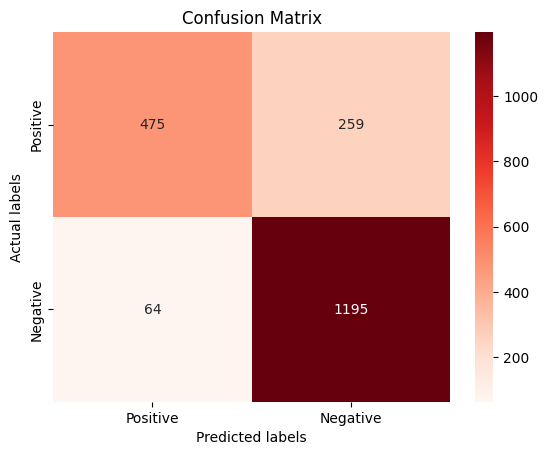

Metric        Score
---------  --------
ROC AUC    0.798152
Precision  0.821871
Recall     0.949166
F1         0.880944
Accuracy   0.837933


In [862]:
calculate_score(clf1_grid,X_train,y_train,X_test,y_test)

### `XGBoost`

In [863]:
# Hyperparameter tuning for XGBoost
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15]}
clf2_grid=GridSearchCV(estimator=clf2,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



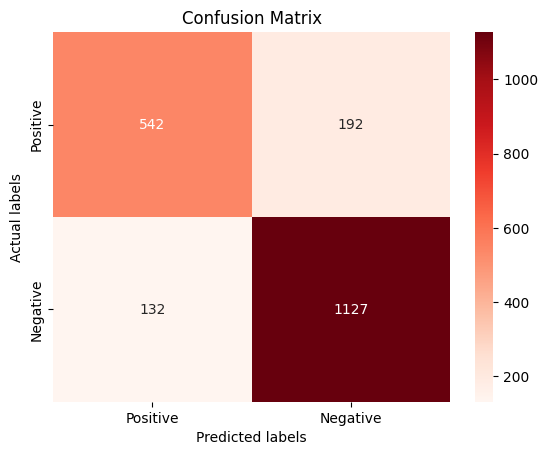

Metric        Score
---------  --------
ROC AUC    0.816787
Precision  0.854435
Recall     0.895155
F1         0.874321
Accuracy   0.837431


In [864]:
calculate_score(clf2_grid,X_train,y_train,X_test,y_test)

### `LightGBM Classifier`

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

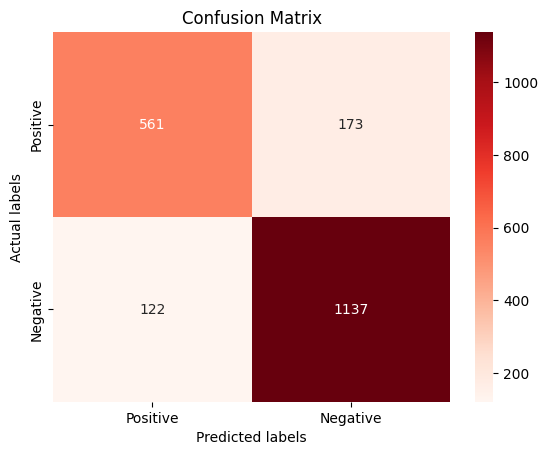

Metric        Score
---------  --------
ROC AUC    0.833701
Precision  0.867939
Recall     0.903098
F1         0.885169
Accuracy   0.851982


In [865]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
# Hyperparameter tuning for LightGBM Classifier
param_grid_lgbm = {
    'learning_rate': [0.05, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'max_depth': [5, 10, 15]
}
clf3_grid = GridSearchCV(clf3, param_grid=param_grid_lgbm, cv=3, scoring='f1_weighted')
calculate_score(clf3_grid,X_train,y_train,X_test,y_test)

In [866]:
#####Best  model is LightGBM

In [867]:
import numpy as np
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
# Define and plot ROC curves for different models
log_reg_best = clf1_grid.best_estimator_
LGBM_best = clf3_grid.best_estimator_
xgb_best = clf2_grid.best_estimator_

lr_scores = log_reg_best.predict_proba(X_test)[:,1]
LGBM_scores = LGBM_best.predict_proba(X_test)[:,1]
xgb_scores = xgb_best.predict_proba(X_test)[:,1]

# Generate ROC curve data for logistic regression model
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_scores)
lr_auc = roc_auc_score(y_test, lr_scores)

# Generate ROC curve data for SVM model
LGBM_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, LGBM_scores)
LGBM_auc = roc_auc_score(y_test,LGBM_scores)


# Generate ROC curve data for XGB  model
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_scores)
xgb_auc = roc_auc_score(y_test, xgb_scores)


# Generate a trace for the Logistic Regression ROC curve
trace0 = go.Scatter(
    x=lr_fpr,
    y=lr_tpr,
    mode='lines',
    name=f'Logistic Regression (Area = {lr_auc:.2f})'
)

# Generate a trace for the SVM ROC curve
trace1 = go.Scatter(
    x=LGBM_fpr,
    y=svm_tpr,
    mode='lines',
    name=f'LGBM (Area = {LGBM_auc:.2f})'
)

# Generate a trace for the XGB  ROC curve
trace2 = go.Scatter(
    x=xgb_fpr,
    y=xgb_tpr,
    mode='lines',
    name=f'XGBoost (Area = {xgb_auc:.2f})'
)

# Diagonal line
trace3 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode='lines',
    name='Random (Area = 0.5)',
    line=dict(dash='dash')
)

# Create a figure and layout for the ROC curves
data = [trace0, trace1, trace2, trace3]

# Define layout with square aspect ratio
layout = go.Layout(
    title='Receiver Operating Characteristic',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=1000,
    height=800,
    showlegend=True
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


The LightGBM Classifier is performing quite well among  all the three Machine Leaning Models. So we select LightGBM Classifier as our Best MOdel



* Metric        Score
---------      --------
* ROC AUC   -0.848448
* Precision -0.884675
* Recall    -0.902131
* F1        -0.893318
* Accuracy  -0.863021


# **Model Explanation**

In [868]:
#installing LIME
!pip install lime

In [869]:
# LIME SECTION
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
from __future__ import print_function

In [870]:
# Define a list of feature names based on your dataset
feature_names = list(X_train.columns)

In [871]:
# Assuming you have a Pandas DataFrame `X_train`, examine the first few rows
X_train.head()

absolutely  actually  add  added  aloo  amazing  ambiance  ambience  \
4195         0.0       0.0  0.0    0.0   0.0      0.0       0.0  0.000000   
96           0.0       0.0  0.0    0.0   0.0      0.0       0.0  0.000000   
5042         0.0       0.0  0.0    0.0   0.0      0.0       0.0  0.224187   
4481         0.0       0.0  0.0    0.0   0.0      0.0       0.0  0.245427   
8773         0.0       0.0  0.0    0.0   0.0      0.0       0.0  0.000000   

      apart  area  ...  wonderful  work  worst  worth  wrong  year  yes  \
4195    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
96      0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
5042    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
4481    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   
8773    0.0   0.0  ...        0.0   0.0    0.0    0.0    0.0   0.0  0.0   

      yesterday  yummy  zomato  
4195        0.0    0.0     0.0  
96          0.0    0.0     0.0  
5042        0.0    0.0     0.0  
4481        0.0    0.0     0.0  
8773        0.0    0.0     0.0  

[5 rows x 524 columns]

In [872]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Assuming you have X_train as a Pandas DataFrame and feature_names as a list of column names
explainer = LimeTabularExplainer(X_train.values,
                                 mode="classification",  # Replace with "regression" if you're doing regression
                                 training_labels=None,  # Optional, provide training labels if available
                                 feature_names=feature_names,
                                 class_names=['0', '1'],
                                 discretize_continuous=True,  # Set to True if your data contains continuous features
                                 kernel_width=3)

In [873]:
def predict_fn_LightGMB(data_batch):
    # Ensure data_batch is a 2D array with shape (n_samples, n_features)
    # For classification, return predicted probabilities
    return clf3_grid.predict_proba(data_batch)

In [874]:
# Choose an observation from your test data (e.g., X_test[observation_index])
observation_index = 3  # Replace with the index of the observation you want to explain

data_row_to_test = X_test.values[observation_index]

# Explain the prediction for the chosen observation
exp = explainer.explain_instance(
    data_row_to_test,
   predict_fn_LightGMB,
    num_features=6  # You can adjust the number of features shown in the explanation
)

# Display the explanation (in a Jupyter Notebook)
exp.show_in_notebook(show_all=False)


In [875]:
# Retrieve the actual label from the test data for the chosen observation
y_test.iloc[observation_index]

0

# **Conclusion**

The comprehensive analysis of the data, encompassing various facets of the restaurant industry in Hyderabad, has unearthed a wealth of valuable insights that hold significance for both restaurant proprietors and discerning customers. This conclusion will distill the key findings and implications from the two sections you've presented, providing a holistic perspective on the restaurant landscape in Hyderabad.

The analysis of data in the Hyderabad restaurant industry has revealed valuable insights for both restaurant owners and customers. Here's a concise summary of key findings:

**Restaurant Pricing & Trends:**
- Hyderabad offers a range of restaurant pricing, with some outliers.
- Pricing varies over time, reflecting market dynamics and competition.

**Day-of-Week and Time-of-Day Pricing:**
- Opportunities exist for strategic pricing on Wednesdays and Mondays.
- Fridays and Saturdays see lower prices, catering to weekend dining trends.
- Pricing varies by time of day to accommodate different customer needs.

**Customer Review Analysis & Influential Reviewers:**
- Customer reviews are diverse in length, emphasizing the need to cater to varying preferences.
- Influential reviewers like "Satwinder Singh" and "Eat_vth_me" have a significant impact on restaurant reputation.

**Restaurant Cost and Rating:**
- Higher-priced restaurants tend to have higher ratings, indicating perceived value.
- Some outliers combine high ratings with high prices for exceptional dining experiences.

**Revenue Expectations and Correlation Analysis:**
- Revenue potential varies among restaurants due to factors like branding and location.
- Correlation analysis reveals relationships between cost, ratings, and review metrics.

* **Advanced Analysis: Clustering, Sentiment Analysis, Topic Modeling, Machine Learning,Content Based Filtering Recommendation System and LIME Explanation:**
The integration of advanced analytics techniques, including clustering, sentiment analysis, topic modeling, machine learning, and LIME explanation, has ushered in a new era of understanding the restaurant landscape in Hyderabad.

  * **Clustering Analysis** allowed for the categorization of restaurants into distinct segments, providing restaurateurs with a clear framework for market positioning.

  * **Sentiment Analysis** has bridged the gap between customer feedback and actionable insights. By classifying reviews as positive or negative, this analysis offers restaurants a tool to gauge their performance and identify areas for improvement.

  * **Topic Modeling** unveiled underlying themes in reviews, offering a nuanced understanding of customer sentiments and preferences.

  * **Machine Learning** models, especially the SVM Classifier, have demonstrated their potential in predicting sentiment. This can serve as a predictive tool for restaurants to preemptively address customer concerns.
  * **Content Based Recommendation System:** The Content-Based Recommendation System is designed to provide personalized restaurant recommendations to reviewers. It accomplishes this by analyzing the reviews and the restaurants that reviewers have previously visited.This system leverages the content of the reviews, such as the text and sentiments expressed, to understand a reviewer's preferences and dining experiences. It then identifies similarities between these preferences and the attributes of other restaurants, such as cuisine type, location, and overall ratings. Based on these similarities, the system recommends restaurants that align with the reviewer's taste and past dining history

  * **LIME Explanation** enhances the interpretability of machine learning models, empowering restaurants to understand the factors influencing sentiment predictions.

In culmination, this comprehensive analysis amalgamates data-driven insights with advanced analytics techniques, providing a multi-dimensional view of Hyderabad's restaurant ecosystem. Restaurant owners can leverage these findings to optimize pricing strategies, enhance customer engagement, and refine their offerings. Customers, armed with knowledge about pricing trends, review sentiments, and influential reviewers, can make informed dining choices, ultimately elevating their culinary experiences. This project is a testament to the power of data-driven approaches in unraveling the intricacies of the restaurant industry and enhancing the dining experience for all stakeholders.Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***